<a href="https://colab.research.google.com/github/yashps7/EV_Segment_India/blob/main/FEYNN_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INDIAN AGRICULTURE: AN ANALYSIS OF THE CURRENT SCENARIO

##Analyzing Agriculture Production in India

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This dataset, which I obtained from Kaggle, holds a wealth of valuable information sourced from the Indian government's Area Production Statistics (APS) database. Maintained by the Ministry of Agriculture and Farmers Welfare, the APS database offers comprehensive and detailed data on crop production, yield, and cultivated areas across various states and districts in India

In [ ]:
df1 = pd.read_csv('/content/IndiaAgriProduction.csv')

In [ ]:
df1.head(20)

State                  District          Crop  \
0   Andaman and Nicobar Islands                  NICOBARS      Arecanut   
1   Andaman and Nicobar Islands                  NICOBARS      Arecanut   
2   Andaman and Nicobar Islands                  NICOBARS      Arecanut   
3   Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN      Arecanut   
4   Andaman and Nicobar Islands            SOUTH ANDAMANS      Arecanut   
5   Andaman and Nicobar Islands            SOUTH ANDAMANS      Arecanut   
6   Andaman and Nicobar Islands                  NICOBARS        Banana   
7   Andaman and Nicobar Islands                  NICOBARS        Banana   
8   Andaman and Nicobar Islands            SOUTH ANDAMANS        Banana   
9   Andaman and Nicobar Islands            SOUTH ANDAMANS        Banana   
10  Andaman and Nicobar Islands                  NICOBARS  Black pepper   
11  Andaman and Nicobar Islands                  NICOBARS  Black pepper   
12  Andaman and Nicobar Islands            SOUTH ANDAMANS  Black pepper   
13  Andaman and Nicobar Islands            SOUTH ANDAMANS  Black pepper   
14  Andaman and Nicobar Islands                  NICOBARS     Cashewnut   
15  Andaman and Nicobar Islands                  NICOBARS     Cashewnut   
16  Andaman and Nicobar Islands                  NICOBARS     Cashewnut   
17  Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN     Cashewnut   
18  Andaman and Nicobar Islands            SOUTH ANDAMANS     Cashewnut   
19  Andaman and Nicobar Islands            SOUTH ANDAMANS     Cashewnut   

       Year      Season    Area Area Units  Production Production Units  \
0   2001-02      Kharif  1254.0    Hectare     2061.00           Tonnes   
1   2002-03  Whole Year  1258.0    Hectare     2083.00           Tonnes   
2   2003-04  Whole Year  1261.0    Hectare     1525.00           Tonnes   
3   2001-02      Kharif  3100.0    Hectare     5239.00           Tonnes   
4   2002-03  Whole Year  3105.0    Hectare     5267.00           Tonnes   
5   2003-04  Whole Year  3118.0    Hectare     5182.00           Tonnes   
6   2002-03  Whole Year   213.0    Hectare     1278.00           Tonnes   
7   2003-04  Whole Year   266.0    Hectare     1763.00           Tonnes   
8   2002-03  Whole Year  1524.0    Hectare    10882.00           Tonnes   
9   2003-04  Whole Year  1530.0    Hectare    11558.00           Tonnes   
10  2002-03  Whole Year    63.0    Hectare       13.50           Tonnes   
11  2003-04  Whole Year    75.5    Hectare       15.86           Tonnes   
12  2002-03  Whole Year   487.0    Hectare      102.50           Tonnes   
13  2003-04  Whole Year   497.0    Hectare      104.37           Tonnes   
14  2001-02  Whole Year   719.0    Hectare      192.00           Tonnes   
15  2002-03  Whole Year   719.0    Hectare      208.00           Tonnes   
16  2003-04  Whole Year   717.0    Hectare      208.50           Tonnes   
17  2001-02  Whole Year    81.0    Hectare       33.00           Tonnes   
18  2002-03  Whole Year    81.0    Hectare       24.00           Tonnes   
19  2003-04  Whole Year   116.5    Hectare       26.14           Tonnes   

       Yield  
0   1.643541  
1   1.655803  
2   1.209358  
3   1.690000  
4   1.696296  
5   1.661963  
6   6.000000  
7   6.627820  
8   7.140420  
9   7.554248  
10  0.214286  
11  0.210066  
12  0.210472  
13  0.210000  
14  0.267038  
15  0.289291  
16  0.290795  
17  0.407407  
18  0.296296  
19  0.224378

In [ ]:
df1.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units',
       'Production', 'Production Units', 'Yield'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [ ]:
print(df1.shape)                              #Dropping all the none crop or area value rows if any
df1 = df1.dropna(subset=['Area','Crop', 'Production'])
print(df1.shape)

(345407, 10)
(340414, 10)


In [ ]:
df1.describe()

Area    Production          Yield
count  3.404140e+05  3.404140e+05  340414.000000
mean   1.182535e+04  9.583711e+05      80.564577
std    4.612484e+04  2.152986e+07     923.232000
min    8.000000e-03  0.000000e+00       0.000000
25%    8.000000e+01  8.700000e+01       0.567920
50%    5.630000e+02  7.170000e+02       1.025000
75%    4.257000e+03  7.176000e+03       2.500000
max    8.580100e+06  1.597800e+09   43958.333333

In [ ]:
state_name = pd.unique(df1.State)
state_name

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Telangana', 'Laddakh'], dtype=object)

In [ ]:
district_name = pd.unique(df1.District)
len(district_name)

728

In [ ]:
crop_name = pd.unique(df1.Crop)
crop_name, len(crop_name)

(array(['Arecanut', 'Banana', 'Black pepper', 'Cashewnut', 'Coconut',
        'Dry chillies', 'Ginger', 'Other Kharif pulses', 'other oilseeds',
        'Rice', 'Sugarcane', 'Sweet potato', 'Arhar/Tur', 'Bajra',
        'Castor seed', 'Coriander', 'Cotton(lint)', 'Gram', 'Groundnut',
        'Horse-gram', 'Jowar', 'Linseed', 'Maize', 'Mesta',
        'Moong(Green Gram)', 'Niger seed', 'Onion', 'Other Rabi pulses',
        'Potato', 'Ragi', 'Rapeseed &Mustard', 'Safflower', 'Sesamum',
        'Small millets', 'Soyabean', 'Sunflower', 'Tapioca', 'Tobacco',
        'Turmeric', 'Urad', 'Wheat', 'Oilseeds total', 'Jute', 'Masoor',
        'Peas & beans (Pulses)', 'Barley', 'Garlic', 'Khesari', 'Sannhamp',
        'Guar seed', 'Moth', 'Cardamom', 'Other Cereals', 'Cowpea(Lobia)',
        'Dry Ginger', 'Other Summer Pulses'], dtype=object),
 56)

In [ ]:
pd.unique(df1.Season)

array(['Kharif', 'Whole Year', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

In [ ]:
years = pd.unique(df1.Year)
len(years)

24

In [ ]:
df1.Area.any()<0 or df1.Production.any()<0 or df1.Yield.any() < 0    #Checking incorrect data

False

In [ ]:
df1[df1.Year =='2019-20'].groupby('Crop')['Production'].sum().sort_values(ascending = False).head(15)

Crop
Coconut              1.754067e+10
Sugarcane            3.672102e+08
Rice                 1.346315e+08
Wheat                1.324181e+08
Potato               3.961274e+07
Cotton(lint)         3.317887e+07
Maize                3.262485e+07
Banana               1.902935e+07
Onion                1.165017e+07
Gram                 1.143014e+07
Bajra                1.115496e+07
Soyabean             1.019675e+07
Groundnut            9.957029e+06
Jute                 9.283060e+06
Rapeseed &Mustard    9.101973e+06
Name: Production, dtype: float64

Seems like the production of Coconut is skewing the value in production because of the weight of the produce. To analyze crop production, so exclude Coconut from the analysis

####For Year 2019-20



In [ ]:
crop_df = df1[df1.Crop != 'Coconut']
crop_df_19_20 = crop_df[crop_df.Year == '2019-20']
grouped_state_19_20 = crop_df_19_20.groupby('State')
grouped_crop_19_20 = crop_df_19_20.groupby('Crop')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Madhya Pradesh'),
  Text(1, 0, 'Rajasthan'),
  Text(2, 0, 'Uttar Pradesh'),
  Text(3, 0, 'Maharashtra'),
  Text(4, 0, 'Karnataka'),
  Text(5, 0, 'Gujarat'),
  Text(6, 0, 'West Bengal'),
  Text(7, 0, 'Punjab'),
  Text(8, 0, 'Telangana'),
  Text(9, 0, 'Andhra Pradesh'),
  Text(10, 0, 'Bihar'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Chhattisgarh'),
  Text(13, 0, 'Odisha'),
  Text(14, 0, 'Tamil Nadu'),
  Text(15, 0, 'Assam'),
  Text(16, 0, 'Jharkhand'),
  Text(17, 0, 'Uttarakhand'),
  Text(18, 0, 'Jammu and Kashmir'),
  Text(19, 0, 'Himachal Pradesh'),
  Text(20, 0, 'Kerala'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Tripura'),
  Text(23, 0, 'Arunachal Pradesh'),
  Text(24, 0, 'Meghalaya'),
  Text(25, 0, 'Goa'),
  Text(26, 0, 'Mizoram'),
  Text(27, 0, 'Sikkim'),
  Text(28, 0, 'Delhi'),
 

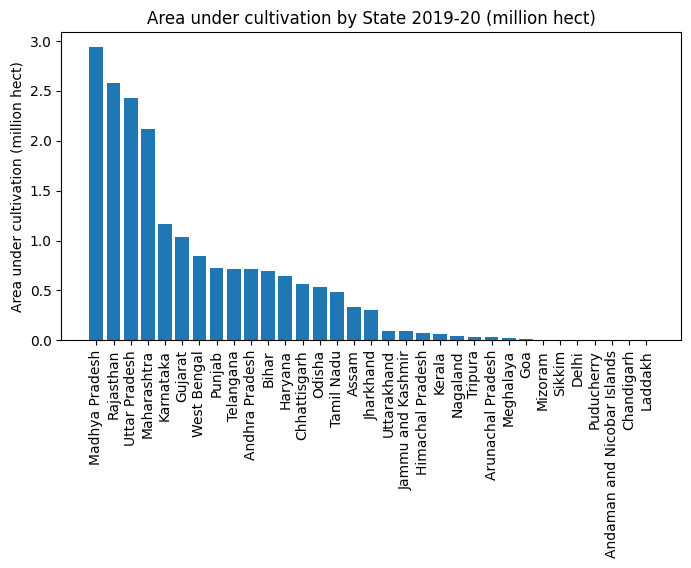

In [ ]:
area_by_state_19_20 = grouped_state_19_20['Area'].sum().sort_values(ascending = False)
plt.figure(figsize = (8,4))
plt.bar(area_by_state_19_20.index , area_by_state_19_20/1e7)
plt.title('Area under cultivation by State 2019-20 (million hect)')
plt.ylabel('Area under cultivation (million hect)')
plt.xticks(rotation=90)

Most of the area under cultivation falls in the northern and central regions of the country with Karnataka, Andhra Pradesh and Telangana contributing significantly as well

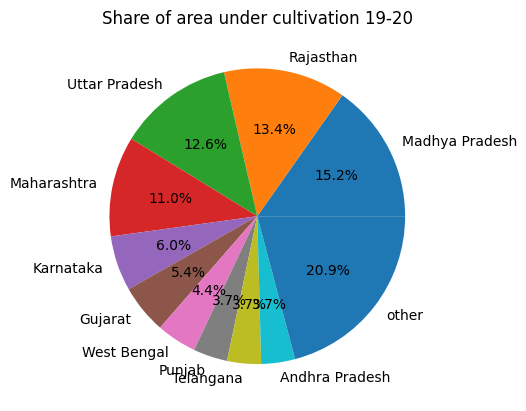

In [ ]:
# Share of area under cultivation:
pie_break = [i for i in area_by_state_19_20.head(10)] + [area_by_state_19_20.sum() - (area_by_state_19_20.head(10).sum())]
pie_labels = [i for i in area_by_state_19_20.head(10).index] + ['other']
plt.title('Share of area under cultivation 19-20')
piec= plt.pie(pie_break, labels = pie_labels, autopct='%.1f%%');

More than 50% of the area under cultivation of crops is in the 4 states of MP, UP, Rajasthan and Maharashtra

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Madhya Pradesh'),
  Text(3, 0, 'Karnataka'),
  Text(4, 0, 'Gujarat'),
  Text(5, 0, 'West Bengal'),
  Text(6, 0, 'Rajasthan'),
  Text(7, 0, 'Punjab'),
  Text(8, 0, 'Tamil Nadu'),
  Text(9, 0, 'Andhra Pradesh'),
  Text(10, 0, 'Bihar'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Telangana'),
  Text(13, 0, 'Odisha'),
  Text(14, 0, 'Chhattisgarh'),
  Text(15, 0, 'Assam'),
  Text(16, 0, 'Uttarakhand'),
  Text(17, 0, 'Jharkhand'),
  Text(18, 0, 'Kerala'),
  Text(19, 0, 'Himachal Pradesh'),
  Text(20, 0, 'Jammu and Kashmir'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Meghalaya'),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Arunachal Pradesh'),
  Text(25, 0, 'Puducherry'),
  Text(26, 0, 'Goa'),
  Text(27, 0, 'Mizoram'),
  Text(28, 0, 'Delhi'

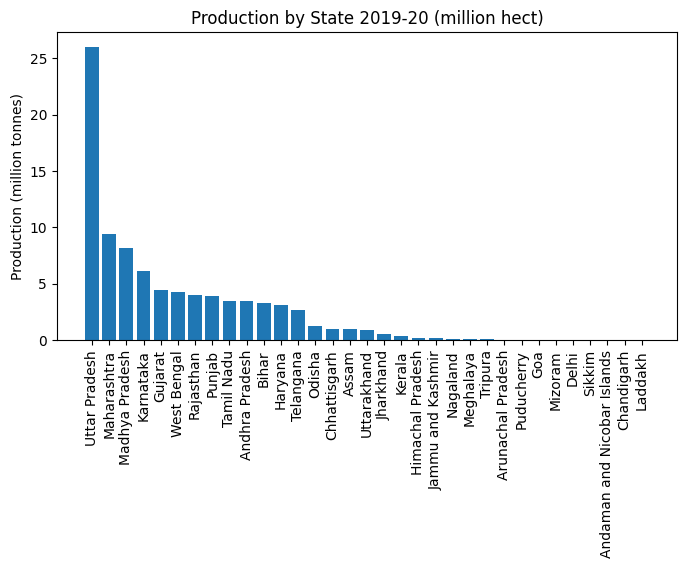

In [ ]:
prod_by_state_19_20 = grouped_state_19_20['Production'].sum().sort_values(ascending = False)
plt.figure(figsize = (8,4))
plt.bar(prod_by_state_19_20.index , prod_by_state_19_20/1e7)
plt.title('Production by State 2019-20 (million hect)')
plt.ylabel('Production (million tonnes)')
plt.xticks(rotation=90)

Production by volume is highest in UP, with a production of more than 2x of the next state, Maharashtra.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Kerala'),
  Text(1, 0, 'Punjab'),
  Text(2, 0, 'Haryana'),
  Text(3, 0, 'Goa'),
  Text(4, 0, 'Puducherry'),
  Text(5, 0, 'Tamil Nadu'),
  Text(6, 0, 'Uttar Pradesh'),
  Text(7, 0, 'Telangana'),
  Text(8, 0, 'Andhra Pradesh'),
  Text(9, 0, 'Andaman and Nicobar Islands'),
  Text(10, 0, 'West Bengal'),
  Text(11, 0, 'Madhya Pradesh'),
  Text(12, 0, 'Gujarat'),
  Text(13, 0, 'Bihar'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Assam'),
  Text(16, 0, 'Chandigarh'),
  Text(17, 0, 'Uttarakhand'),
  Text(18, 0, 'Rajasthan'),
  Text(19, 0, 'Nagaland'),
  Text(20, 0, 'Meghalaya'),
  Text(21, 0, 'Odisha'),
  Text(22, 0, 'Tripura'),
  Text(23, 0, 'Mizoram'),
  Text(24, 0, 'Delhi'),
  Text(25, 0, 'Maharashtra'),
  Text(26, 0, 'Arunachal Pradesh'),
  Text(27, 0, 'Himachal Pradesh'),
  Text(28, 0, 'Ch

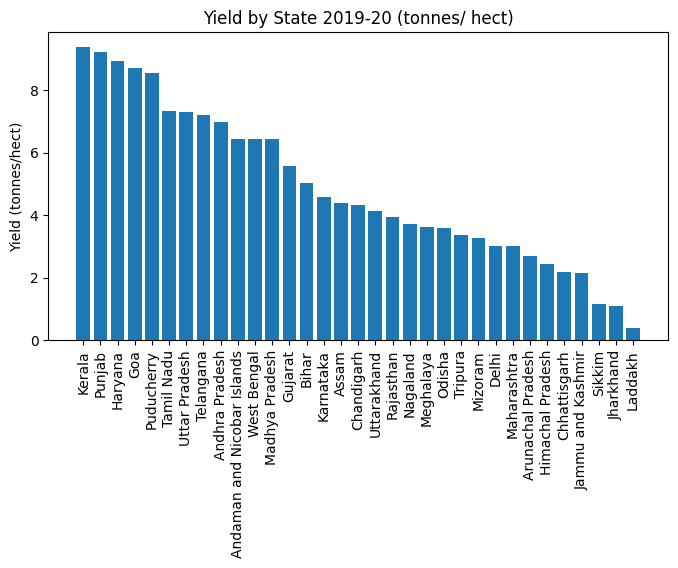

In [ ]:
# Comparing the yields to the area in 19_20 excluding coconuts
plt.figure(figsize = (8,4))
yield_by_state_19_20 = grouped_state_19_20['Yield'].mean().sort_values(ascending = False)
plt.bar(yield_by_state_19_20.index , yield_by_state_19_20)
plt.title('Yield by State 2019-20 (tonnes/ hect)')
plt.ylabel('Yield (tonnes/hect)')
plt.xticks(rotation=90)

States with the highest output are down the line when it comes to yield per hectare. Reasons could include :

* Poor crop variety

* Outdated methods of cultivation

* Lack of knowledge/experience with higher yielding varieties/techniques

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Sugarcane'),
  Text(1, 0, 'Rice'),
  Text(2, 0, 'Wheat'),
  Text(3, 0, 'Potato'),
  Text(4, 0, 'Cotton(lint)'),
  Text(5, 0, 'Maize'),
  Text(6, 0, 'Banana'),
  Text(7, 0, 'Onion'),
  Text(8, 0, 'Gram'),
  Text(9, 0, 'Bajra'),
  Text(10, 0, 'Soyabean'),
  Text(11, 0, 'Groundnut'),
  Text(12, 0, 'Jute'),
  Text(13, 0, 'Rapeseed &Mustard'),
  Text(14, 0, 'Tapioca'),
  Text(15, 0, 'Arecanut'),
  Text(16, 0, 'Jowar'),
  Text(17, 0, 'Arhar/Tur'),
  Text(18, 0, 'Oilseeds total'),
  Text(19, 0, 'Moong(Green Gram)'),
  Text(20, 0, 'other oilseeds'),
  Text(21, 0, 'Garlic'),
  Text(22, 0, 'Urad'),
  Text(23, 0, 'Castor seed'),
  Text(24, 0, 'Barley'),
  Text(25, 0, 'Ragi'

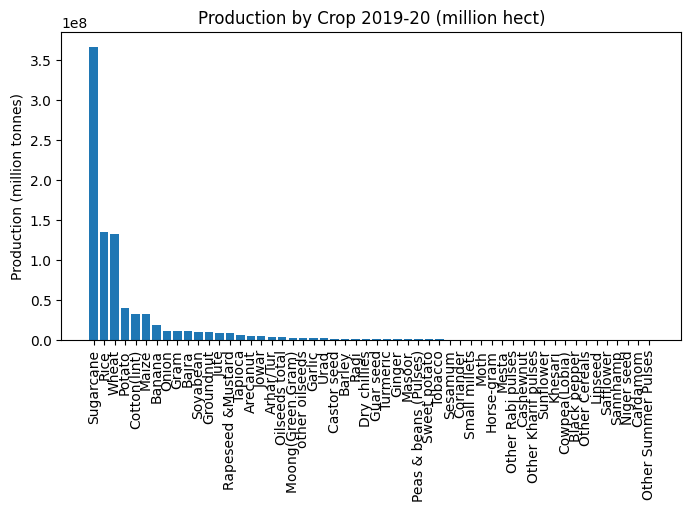

In [ ]:
# Production % by crop_type excluding coconut
plt.figure(figsize = (8,4))
percent_crop_19_20 = grouped_crop_19_20['Production'].sum().sort_values(ascending = False)
plt.bar(percent_crop_19_20.index , percent_crop_19_20)
plt.title('Production by Crop 2019-20 (million hect)')
plt.ylabel('Production (million tonnes)')
plt.xticks(rotation=90)

Sugracane cultivation tops the list with an output more than rice and wheat combined . Rice, wheat and potato are follow as the primary staple produce in the country

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Madhya Pradesh'),
  Text(2, 0, 'Punjab'),
  Text(3, 0, 'Haryana'),
  Text(4, 0, 'West Bengal'),
  Text(5, 0, 'Rajasthan'),
  Text(6, 0, 'Bihar'),
  Text(7, 0, 'Telangana'),
  Text(8, 0, 'Odisha'),
  Text(9, 0, 'Andhra Pradesh'),
  Text(10, 0, 'Chhattisgarh'),
  Text(11, 0, 'Tamil Nadu'),
  Text(12, 0, 'Gujarat'),
  Text(13, 0, 'Assam'),
  Text(14, 0, 'Maharashtra'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Jharkhand'),
  Text(17, 0, 'Uttarakhand'),
  Text(18, 0, 'Jammu and Kashmir'),
  Text(19, 0, 'Tripura'),
  Text(20, 0, 'Himachal Pradesh'),
  Text(21, 0, 'Kerala'),
  Text(22, 0, 'Nagaland'),
  Text(23, 0, 'Meghalaya'),
  Text(24, 0, 'Arunachal Pradesh'),
  Text(25, 0, 'Delhi'),
  Text(26, 0, 'Goa'),
  Text(27, 0, 'Mizoram'),
  Text(28, 0, 'Puducherry'),
  T

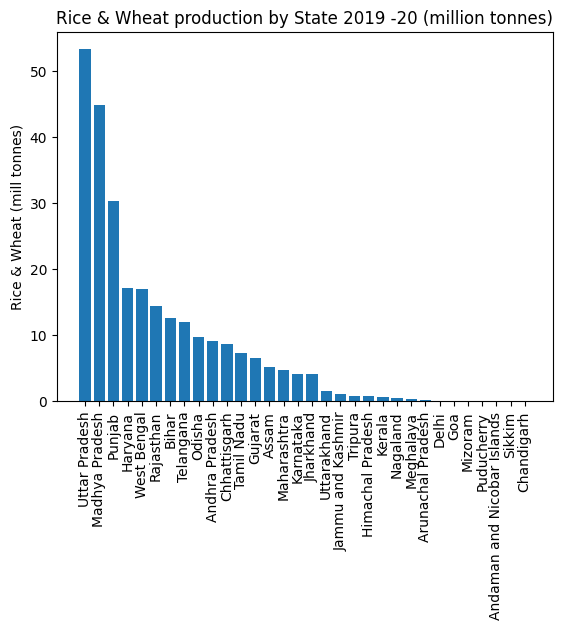

In [ ]:
# Checking the highest producers of Rice, Wheat
rice_wheat_19_20 = crop_df_19_20[crop_df_19_20.Crop.isin(['Rice', 'Wheat'])]
rw_prodbystate_19_20 = rice_wheat_19_20.groupby('State')['Production'].sum().sort_values(ascending = False)
plt.bar(rw_prodbystate_19_20.index, rw_prodbystate_19_20/1e6)
plt.title('Rice & Wheat production by State 2019 -20 (million tonnes)')
plt.ylabel('Rice & Wheat (mill tonnes)')
plt.xticks(rotation=90)

Majority of the rice producing states are the northern and central Indian states along with State like West Bengal


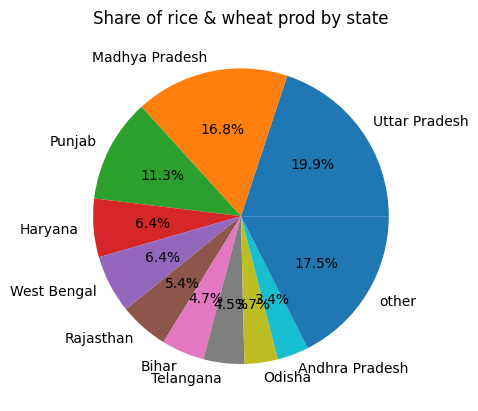

In [ ]:
# Share of rice & wheat prod by state
rw_top10 = [i for i in rw_prodbystate_19_20.head(10)]+[rw_prodbystate_19_20.sum() - (rw_prodbystate_19_20.head(10).sum())]
rw_label = [i for i in rw_prodbystate_19_20.head(10).index] + ['other']
plt.pie(rw_top10, labels = rw_label, autopct = '%.1f%%')
plt.title('Share of rice & wheat prod by state');

Again, the top 4 states contribute to more than 50%

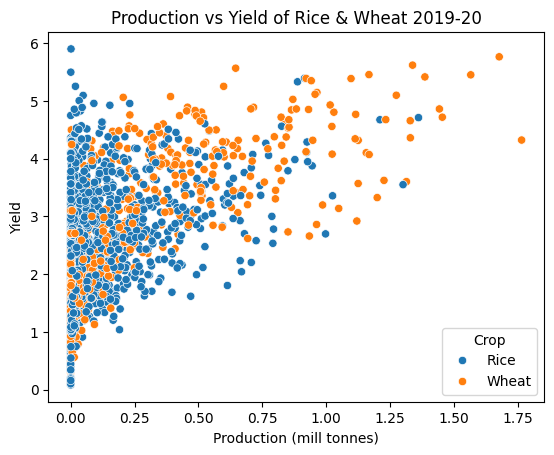

In [ ]:
# Yield of rice & wheat
sns.scatterplot(data = rice_wheat_19_20 ,x = rice_wheat_19_20.Production/1e6, y = 'Yield' , hue = 'Crop')
plt.title('Production vs Yield of Rice & Wheat 2019-20')
plt.xlabel('Production (mill tonnes)');

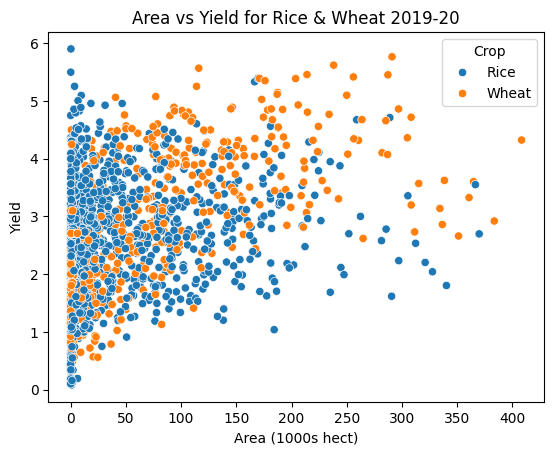

In [ ]:
# Area vs yield
sns.scatterplot(data = rice_wheat_19_20 ,x =rice_wheat_19_20.Area/1000, y = 'Yield' , hue = 'Crop')
plt.title('Area vs Yield for Rice & Wheat 2019-20')
plt.xlabel('Area (1000s hect)');

Majority of the yield of rice falls below the 4.5 tonns/hectare level whereas wheat sustains till the 5.5 tonnes/hectare levels.

While this lies between the global average of 3-6 tonns/hectare, there is room for significant development, especially in areas with smaller areas of cultivation since a mojority of these produce low to average yields. Hence we have potential to become World Level Exporter


In [ ]:
# Growth statistics for rice & wheat production in India over the years
rw_years = df1[df1.Crop.isin(['Rice', 'Wheat'])][['Year', 'Yield', 'Area', 'Production', 'State']]
rw_years.drop(rw_years.index[rw_years.Year == '2020-21'], inplace = True) #2020-21 year is not complete in dataset
rw_group = rw_years.groupby('Year')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1997-98'),
  Text(1, 0, '1998-99'),
  Text(2, 0, '1999-00'),
  Text(3, 0, '2000-01'),
  Text(4, 0, '2001-02'),
  Text(5, 0, '2002-03'),
  Text(6, 0, '2003-04'),
  Text(7, 0, '2004-05'),
  Text(8, 0, '2005-06'),
  Text(9, 0, '2006-07'),
  Text(10, 0, '2007-08'),
  Text(11, 0, '2008-09'),
  Text(12, 0, '2009-10'),
  Text(13, 0, '2010-11'),
  Text(14, 0, '2011-12'),
  Text(15, 0, '2012-13'),
  Text(16, 0, '2013-14'),
  Text(17, 0, '2014-15'),
  Text(18, 0, '2015-16'),
  Text(19, 0, '2016-17'),
  Text(20, 0, '2017-18'),
  Text(21, 0, '2018-19'),
  Text(22, 0, '2019-20')])

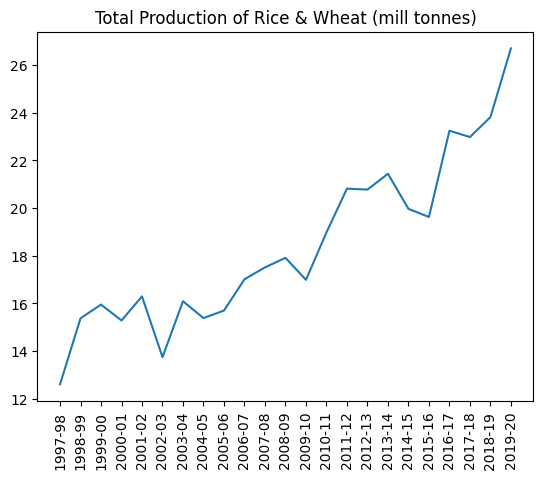

In [ ]:
# Plotting the change over the years in Production
plt.plot(rw_group['Production'].sum()/1e7)
plt.title('Total Production of Rice & Wheat (mill tonnes)')
plt.xticks(rotation=90)

Steady Increase in Production

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1997-98'),
  Text(1, 0, '1998-99'),
  Text(2, 0, '1999-00'),
  Text(3, 0, '2000-01'),
  Text(4, 0, '2001-02'),
  Text(5, 0, '2002-03'),
  Text(6, 0, '2003-04'),
  Text(7, 0, '2004-05'),
  Text(8, 0, '2005-06'),
  Text(9, 0, '2006-07'),
  Text(10, 0, '2007-08'),
  Text(11, 0, '2008-09'),
  Text(12, 0, '2009-10'),
  Text(13, 0, '2010-11'),
  Text(14, 0, '2011-12'),
  Text(15, 0, '2012-13'),
  Text(16, 0, '2013-14'),
  Text(17, 0, '2014-15'),
  Text(18, 0, '2015-16'),
  Text(19, 0, '2016-17'),
  Text(20, 0, '2017-18'),
  Text(21, 0, '2018-19'),
  Text(22, 0, '2019-20')])

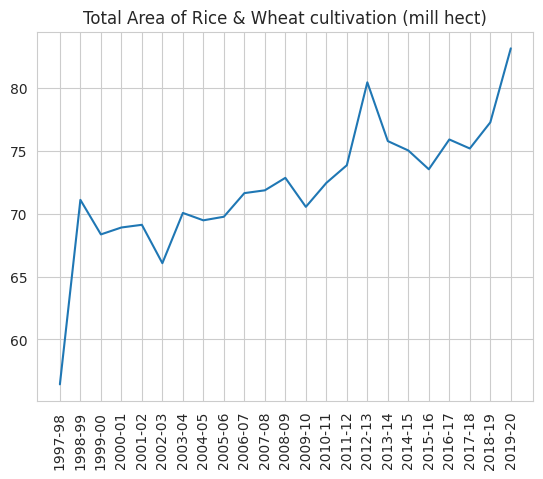

In [ ]:
# Plotting the change over the years in Area
sns.set_style('whitegrid')
plt.plot(rw_group['Area'].sum()/1e6)
plt.title('Total Area of Rice & Wheat cultivation (mill hect)')
plt.xticks(rotation=90)

In [ ]:
print(rw_years[rw_years.Year.isin(['2011-12', '2012-13', '2013-14'])].groupby(['State', 'Year'])['Area'].sum().to_string())

State                        Year   
Andaman and Nicobar Islands  2011-12        8100.00
                             2012-13        7850.00
                             2013-14        8005.20
Andhra Pradesh               2011-12     4104103.00
                             2012-13     3636000.00
                             2013-14     2583788.00
Arunachal Pradesh            2011-12      127200.00
                             2012-13      129022.00
                             2013-14      134949.00
Assam                        2011-12     2585900.00
                             2012-13     2518712.00
                             2013-14     2534495.00
Bihar                        2011-12     5492828.00
                             2012-13     5506591.00
                             2013-14     5299632.00
Chandigarh                   2011-12         620.00
                             2012-13         595.00
                             2013-14         595.00
Chhattisgarh               

There is mistake in Odisha State. So correct it from (https://nfsm.gov.in/StatusPaper/Rice2016.pdf)

In [ ]:
# Data = 12379039.00 ; Observed = 4180000.00 : Diff = 12379039.00 - 4180000.00
revised_rw_group = rw_group['Area'].sum()
revised_rw_group['2012-13'] = (revised_rw_group['2012-13']) - (12379039.00 - 4180000.00 )

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1997-98'),
  Text(1, 0, '1998-99'),
  Text(2, 0, '1999-00'),
  Text(3, 0, '2000-01'),
  Text(4, 0, '2001-02'),
  Text(5, 0, '2002-03'),
  Text(6, 0, '2003-04'),
  Text(7, 0, '2004-05'),
  Text(8, 0, '2005-06'),
  Text(9, 0, '2006-07'),
  Text(10, 0, '2007-08'),
  Text(11, 0, '2008-09'),
  Text(12, 0, '2009-10'),
  Text(13, 0, '2010-11'),
  Text(14, 0, '2011-12'),
  Text(15, 0, '2012-13'),
  Text(16, 0, '2013-14'),
  Text(17, 0, '2014-15'),
  Text(18, 0, '2015-16'),
  Text(19, 0, '2016-17'),
  Text(20, 0, '2017-18'),
  Text(21, 0, '2018-19'),
  Text(22, 0, '2019-20')])

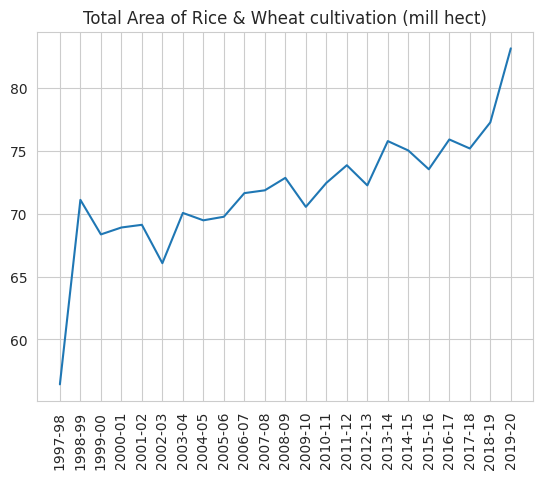

In [ ]:
# Plotting the change over the years
sns.set_style('whitegrid')
plt.plot(revised_rw_group/1e6)
plt.title('Total Area of Rice & Wheat cultivation (mill hect)')
plt.xticks(rotation=90)

Area under cultivation for rice & wheat have been increasing over the past 20 years


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1997-98'),
  Text(1, 0, '1998-99'),
  Text(2, 0, '1999-00'),
  Text(3, 0, '2000-01'),
  Text(4, 0, '2001-02'),
  Text(5, 0, '2002-03'),
  Text(6, 0, '2003-04'),
  Text(7, 0, '2004-05'),
  Text(8, 0, '2005-06'),
  Text(9, 0, '2006-07'),
  Text(10, 0, '2007-08'),
  Text(11, 0, '2008-09'),
  Text(12, 0, '2009-10'),
  Text(13, 0, '2010-11'),
  Text(14, 0, '2011-12'),
  Text(15, 0, '2012-13'),
  Text(16, 0, '2013-14'),
  Text(17, 0, '2014-15'),
  Text(18, 0, '2015-16'),
  Text(19, 0, '2016-17'),
  Text(20, 0, '2017-18'),
  Text(21, 0, '2018-19'),
  Text(22, 0, '2019-20')])

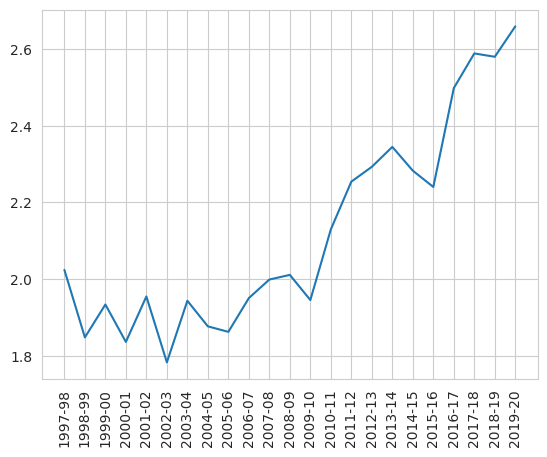

In [ ]:
# Yield growth of rice, wheat
plt.plot(rw_group.Yield.mean())
plt.xticks(rotation=90)

Yields have increased consistently

In [ ]:
# HEATMAP OF YIELD BY STATE OF WHEAT OVER THE YEARS
heatmap_df = rw_years[['State', 'Year', 'Yield']].groupby(['State', 'Year'])['Yield'].mean()
heatmap_df = heatmap_df.unstack(level = -1)

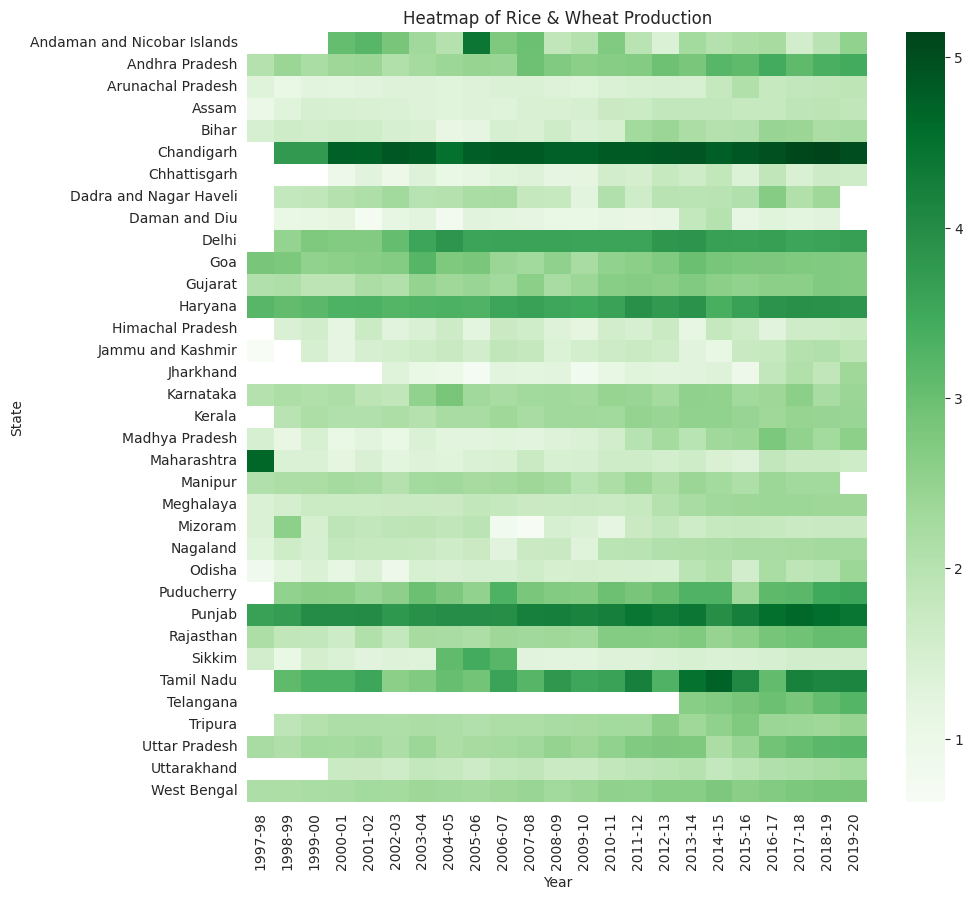

In [ ]:
# HEATMAP
plt.figure(figsize = (10,10))
sns.set_style('white')
sns.heatmap(heatmap_df, cmap = 'Greens')
plt.title('Heatmap of Rice & Wheat Production');

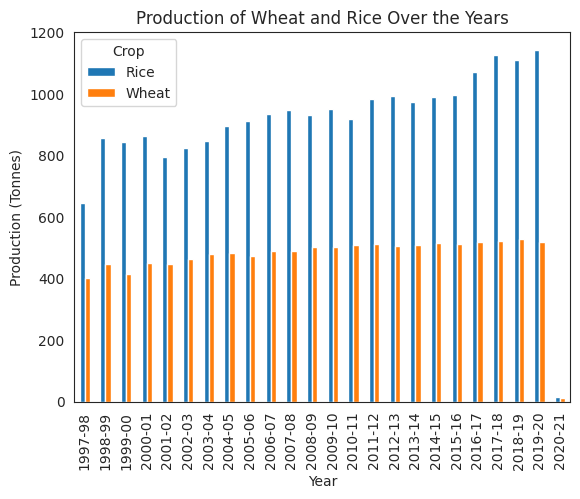

Crop     Rice  Wheat
Year                
1997-98   647    403
1998-99   856    448
1999-00   843    416
2000-01   864    452
2001-02   795    447
2002-03   824    464
2003-04   846    479
2004-05   897    484
2005-06   911    474
2006-07   934    488

In [ ]:
crops = ['Rice', 'Wheat']
crop_data = df1[df1['Crop'].isin(crops)]
crop_production_by_year = crop_data.groupby(['Year', 'Crop']).size().unstack()

crop_production_by_year.plot(kind='bar', stacked=False)
plt.xlabel('Year')
plt.ylabel('Production (Tonnes)')
plt.title('Production of Wheat and Rice Over the Years')
plt.legend(title='Crop')
plt.show()

crop_production_by_year.head(10)

Growth in Rice is more and we should look into it as well as produce alternate like wheat or millets in case of severe conditions like El-nino or excess rainfall prediction

###Now answering few important questions

#####What are the most commonly grown crops in each state?

In [ ]:
crop_counts = df1.groupby(['State', 'Crop']).size().reset_index(name='Count')
most_common_crop = crop_counts.groupby('State').apply(lambda x: x.loc[x['Count'].idxmax()]).reset_index(drop=True)

In [ ]:
most_common_crop

State                   Crop  Count
0   Andaman and Nicobar Islands               Arecanut     50
1                Andhra Pradesh                   Rice    893
2             Arunachal Pradesh                  Maize    380
3                         Assam                   Rice   1756
4                         Bihar                  Maize   2579
5                    Chandigarh                   Rice     22
6                  Chhattisgarh      Moong(Green Gram)    774
7        Dadra and Nagar Haveli                   Rice     39
8                 Daman and Diu                  Bajra     21
9                         Delhi                  Bajra     22
10                          Goa                   Rice     70
11                      Gujarat              Groundnut   1099
12                      Haryana                  Wheat    467
13             Himachal Pradesh                 Potato    345
14            Jammu and Kashmir                 Potato    389
15                    Jharkhand                   Rice    671
16                    Karnataka                  Maize   1736
17                       Kerala                   Rice    899
18                      Laddakh          Other Cereals      1
19               Madhya Pradesh                  Jowar   1278
20                  Maharashtra                  Maize   1563
21                      Manipur                  Maize    242
22                    Meghalaya                   Rice    473
23                      Mizoram                   Rice    279
24                     Nagaland  Peas & beans (Pulses)    367
25                       Odisha                   Rice   1679
26                   Puducherry                   Rice    151
27                       Punjab                   Rice    448
28                    Rajasthan      Rapeseed &Mustard    748
29                       Sikkim                  Maize     92
30                   Tamil Nadu              Groundnut    871
31                    Telangana                   Rice    305
32                      Tripura                   Rice    224
33                Uttar Pradesh                  Maize   3497
34                  Uttarakhand                 Potato    462
35                  West Bengal                   Rice   1279

Attempting to Create map

In [ ]:
#getting the geojson file
import requests
import json
geojson_url = "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson"
response = requests.get(geojson_url)
geojson_data = response.json()

In [ ]:
#getting the names of the states in the file
state_names = []
for feature in geojson_data["features"]:
    state_names.append(feature["properties"]["ST_NM"])

In [ ]:
#checking the states names to find in if their is a data mismatch
for state in df1["State"].unique():
    if state not in state_names:
        print("State name not found:", state)

State name not found: Andaman and Nicobar Islands
State name not found: Dadra and Nagar Haveli
State name not found: Daman and Diu
State name not found: Jammu and Kashmir
State name not found: Laddakh


In [ ]:
state_names

['Arunachal Pradesh',
 'Assam',
 'Chandigarh',
 'Karnataka',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tripura',
 'Uttarakhand',
 'Telangana',
 'Bihar',
 'Kerala',
 'Madhya Pradesh',
 'Andaman & Nicobar',
 'Gujarat',
 'Lakshadweep',
 'Odisha',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Ladakh',
 'Jammu & Kashmir',
 'Chhattisgarh',
 'Delhi',
 'Goa',
 'Haryana',
 'Himachal Pradesh',
 'Jharkhand',
 'Tamil Nadu',
 'Uttar Pradesh',
 'West Bengal',
 'Andhra Pradesh',
 'Puducherry',
 'Maharashtra']

Replace "and" with "&" in the state names.

Convert "CHANDIGARH" to lowercase for consistency.

Correct the misspelled state name "Laddak" to "Ladakh".

Merge "Dadra and Nagar Haveli" and "Daman and Diu" into a single region.

In [ ]:
# Before merging "Dadra and Nagar Haveli" and "Daman and Diu" into one territory, it is important to ensure that the districts clearly separate them.
print(df1[df1['State'] =="Daman and Diu"].head(30))
print(df1[df1['State'] =="Dadra and Nagar Haveli"].head())

                State       District   Crop     Year  Season    Area  \
10697   Daman and Diu  Daman and Diu  Bajra  2001-02  Kharif   280.0   
10698   Daman and Diu  Daman and Diu  Bajra  2002-03  Kharif   280.0   
10699   Daman and Diu  Daman and Diu  Bajra  2003-04  Kharif   280.0   
10700   Daman and Diu  Daman and Diu   Rice  2001-02  Kharif  2000.0   
10701   Daman and Diu  Daman and Diu   Rice  2002-03  Kharif  2000.0   
10702   Daman and Diu  Daman and Diu   Rice  2003-04  Kharif  2000.0   
52759   Daman and Diu  Daman and Diu  Bajra  2004-05  Kharif   280.0   
52760   Daman and Diu  Daman and Diu  Bajra  2005-06  Kharif   280.0   
52761   Daman and Diu  Daman and Diu  Bajra  2006-07  Kharif   280.0   
52762   Daman and Diu  Daman and Diu   Rice  2004-05  Kharif  2000.0   
52763   Daman and Diu  Daman and Diu   Rice  2005-06  Kharif  2000.0   
52764   Daman and Diu  Daman and Diu   Rice  2006-07  Kharif  2000.0   
95487   Daman and Diu  Daman and Diu  Bajra  2007-08  Kharif   2

In [ ]:
df1['State'] = df1['State'].str.replace(' and ', ' & ')
state_replacements = {
    'Andaman & Nicobar Island': 'Andaman & Nicobar',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'THE DADRA AND NAGAR HAVELI': 'Dadra and Nagar Haveli and Daman and Diu',
    'Laddak': 'Ladakh',
    'CHANDIGARH' :'Chandigarh'
}
df1['State'] = df1['State'].replace(state_replacements)

In [ ]:
import plotly.express as px
from plotly.offline import  init_notebook_mode, iplot
init_notebook_mode(connected = True)

fig = px.choropleth(
    most_common_crop,
    geojson=geojson_url,
    featureidkey='properties.ST_NM',
    locations='State',
    color='Crop'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title_text='Most Commonly Grown Crops in India by State',
    title_x=0.5,
    title_y=0.9,
    title_font=dict(size=24),
    margin={'l': 0, 'r': 0, 't': 30, 'b': 0},
    height=600,
    width=1000,
    autosize=True,
)
fig.show(renderer="colab")

Due to some issue Ladakh, Lakshwadeep, Andaman & Nicobar was not shown

####What is the highest crop production by season?

In [ ]:
season_production = df1.groupby(['Crop', 'Season'])['Production'].sum().reset_index()

In [ ]:
season_list =season_production.Season.unique()

In [ ]:
#Seasonal distribution
for i in season_list:
  mask =season_production[season_production.Season == i]
  mask=mask.sort_values('Production', ascending=False)
  top_crops = mask.head(10)
  fig = px.bar(top_crops, x='Crop', y='Production', title= 'Highest Crop Production in {}'.format(i))
  fig.show(renderer = 'colab')

#####Which State has the most production throughout the whole year?

In [ ]:
state_production = df1.groupby(['State','Season'])['Production'].sum().reset_index()

In [ ]:
fig = px.choropleth(
    state_production[state_production.Season=='Whole Year'],
    geojson=geojson_url,
    featureidkey='properties.ST_NM',
    locations='State',
    color='Production',color_continuous_scale= 'YlOrRd'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title_text='Production throughout the whole year by state',
    title_x=0.5,
    title_y=0.9,
    title_font=dict(size=24),
    margin={'l': 0, 'r': 0, 't': 30, 'b': 0},
    height=600,
    width=1000,
    autosize=True,
)

fig.show(renderer ='colab')

"Kerala" and southern states has the highest crop production for the whole year

#####Which States has highest production per season?

In [ ]:
fig = px.choropleth(
    state_production,
    geojson=geojson_url,
    featureidkey='properties.ST_NM',
    locations='State',
    animation_frame='Season',
    color='Production',color_continuous_scale= 'YlOrRd'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title_text='Production for each season by State',
    title_x=0.5,
    title_y=0.9,
    title_font=dict(size=24),
    margin={'l': 0, 'r': 0, 't':120, 'b': 0},
    height=500,
    width=800,
    autosize=True,
)

fig.show(renderer='colab')

In the 'Winter' and 'Autumn' seasons most states have zero production, while some states also have zero production in the 'Summer' season. The highest crop production is observed during the 'Kharif' and 'Rabi' seasons, these observations indicate significant variations in crop production across different seasons.

#####Production changed in each state over the years

In [ ]:
state_production_per_year = df1.groupby(['State', 'Year'])['Production'].sum().reset_index()
state_production_per_year = state_production_per_year.sort_values('Year')

In [ ]:
fig = px.choropleth(
    state_production_per_year,
    geojson=geojson_url,
    featureidkey='properties.ST_NM',
    locations='State',
    animation_frame='Year',
    color='Production',
    color_continuous_scale='YlOrRd'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title_text='Crop Production Over the Years by State',
    title_x=0.5,
    title_y=0.9,
    title_font=dict(size=24),
    margin={'l': 0, 'r': 0, 't': 30, 'b': 0},
    height=600,
    width=800,
    autosize=True
)

fig.show(renderer='colab')

###Conclusion
Yields are inconsistend across state, but tend to see an increase for the most part. Innovation with a focus on high-yielding varieties would be beneficial to the market and the producers.

* Need to increase the yields of rice, wheat to bridge the growing price and demand gap and hence target to more than global level
* Districts having relatively lesser areas under cultivation need to focus on more

##Analyzing and PREDICTING optimal Crop Based on various factors

In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']   #To be used later

#####Data fields

N - ratio of Nitrogen content in soil - kg/ha

P - ratio of Phosphorous content in soil - kg/ha

K - ratio of Potassium content in soil - kg/ha

temperature - temperature in degree Celsius

humidity - relative humidity in %

ph - ph value of the soil

rainfall - rainfall in mm

In [ ]:
df2 = pd.read_csv('/content/Crop_recommendation.csv')
df2.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [ ]:
df2.shape

(2200, 8)

In [ ]:
df2.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df2.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [ ]:
print("Number of various crops: ", len(df2['label'].unique()))
print("List of crops: ", df2['label'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
df2['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [ ]:
crop_summary = pd.pivot_table(df2,index=['label'],aggfunc='mean')  #As count is same we use averaging concepts
crop_summary.head()

K       N       P   humidity        ph    rainfall  \
label                                                                
apple      199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana      50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram   19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea    79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut     30.59   21.98   16.93  94.844272  5.976562  175.686646   

           temperature  
label                   
apple        22.630942  
banana       27.376798  
blackgram    29.973340  
chickpea     18.872847  
coconut      27.409892

#####Nitrogen Analysis

In [ ]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show(renderer='colab')

#####Phosphorus Analysis

In [ ]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show(renderer='colab')

#####Potassium Analysis

In [ ]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show(renderer='colab')

####NPK comparison between crops

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show(renderer='colab')

NPK for rice, maize, cotton, jute and coffee

In [ ]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}]])

rice_npk = crop_summary[crop_summary.index=='rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

cotton_npk = crop_summary[crop_summary.index=='cotton']
values = [cotton_npk['N'][0], cotton_npk['P'][0], cotton_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Cotton"),1, 2)

jute_npk = crop_summary[crop_summary.index=='jute']
values = [jute_npk['N'][0], jute_npk['P'][0], jute_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Jute"),1, 3)

maize_npk = crop_summary[crop_summary.index=='maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 4)

coffee_npk = crop_summary[crop_summary.index=='lentil']
values = [coffee_npk['N'][0], coffee_npk['P'][0], coffee_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Lentil"),1, 5)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, cotton, jute, maize, lentil",
    annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=15, showarrow=False),
                 dict(text='Cotton',x=0.26,y=0.8, font_size=15, showarrow=False),
                 dict(text='Jute',x=0.50,y=0.8, font_size=15, showarrow=False),
                 dict(text='Maize',x=0.74,y=0.8, font_size=15, showarrow=False),
                dict(text='Coffee',x=0.94,y=0.8, font_size=15, showarrow=False)])
fig.show(renderer='colab')

Let's evaluate some scatterplots

In [ ]:
crop_scatter = df2[(df2['label']=='rice') |
                      (df2['label']=='mango') |
                      (df2['label']=='banana') |
                     (df2['label']=='maize') |
                     (df2['label']=='apple')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show(renderer='colab')

Analyze climate factors

<ipython-input-66-c9f2b8acf490>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-66-c9f2b8acf490>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='ph', ylabel='Density'>

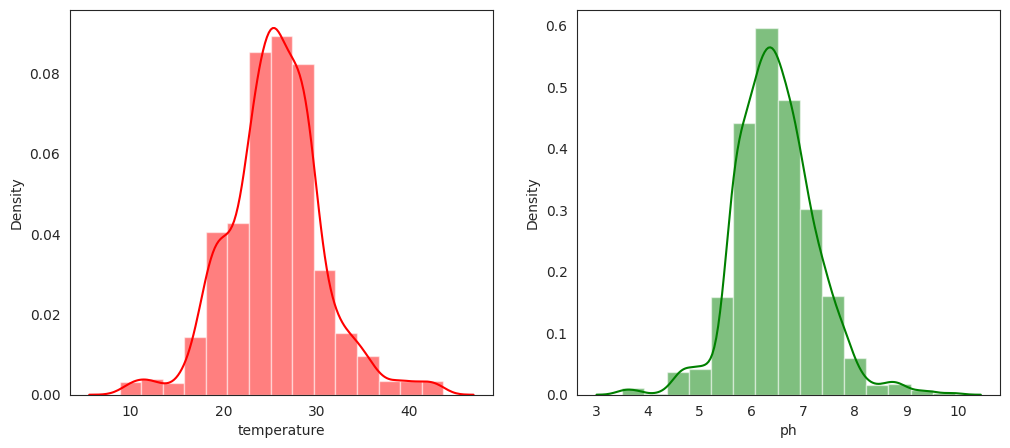

In [ ]:
#Check Temp and pH Factor
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(df2['temperature'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(df2['ph'],color="green",bins=15,hist_kws={'alpha':0.5})

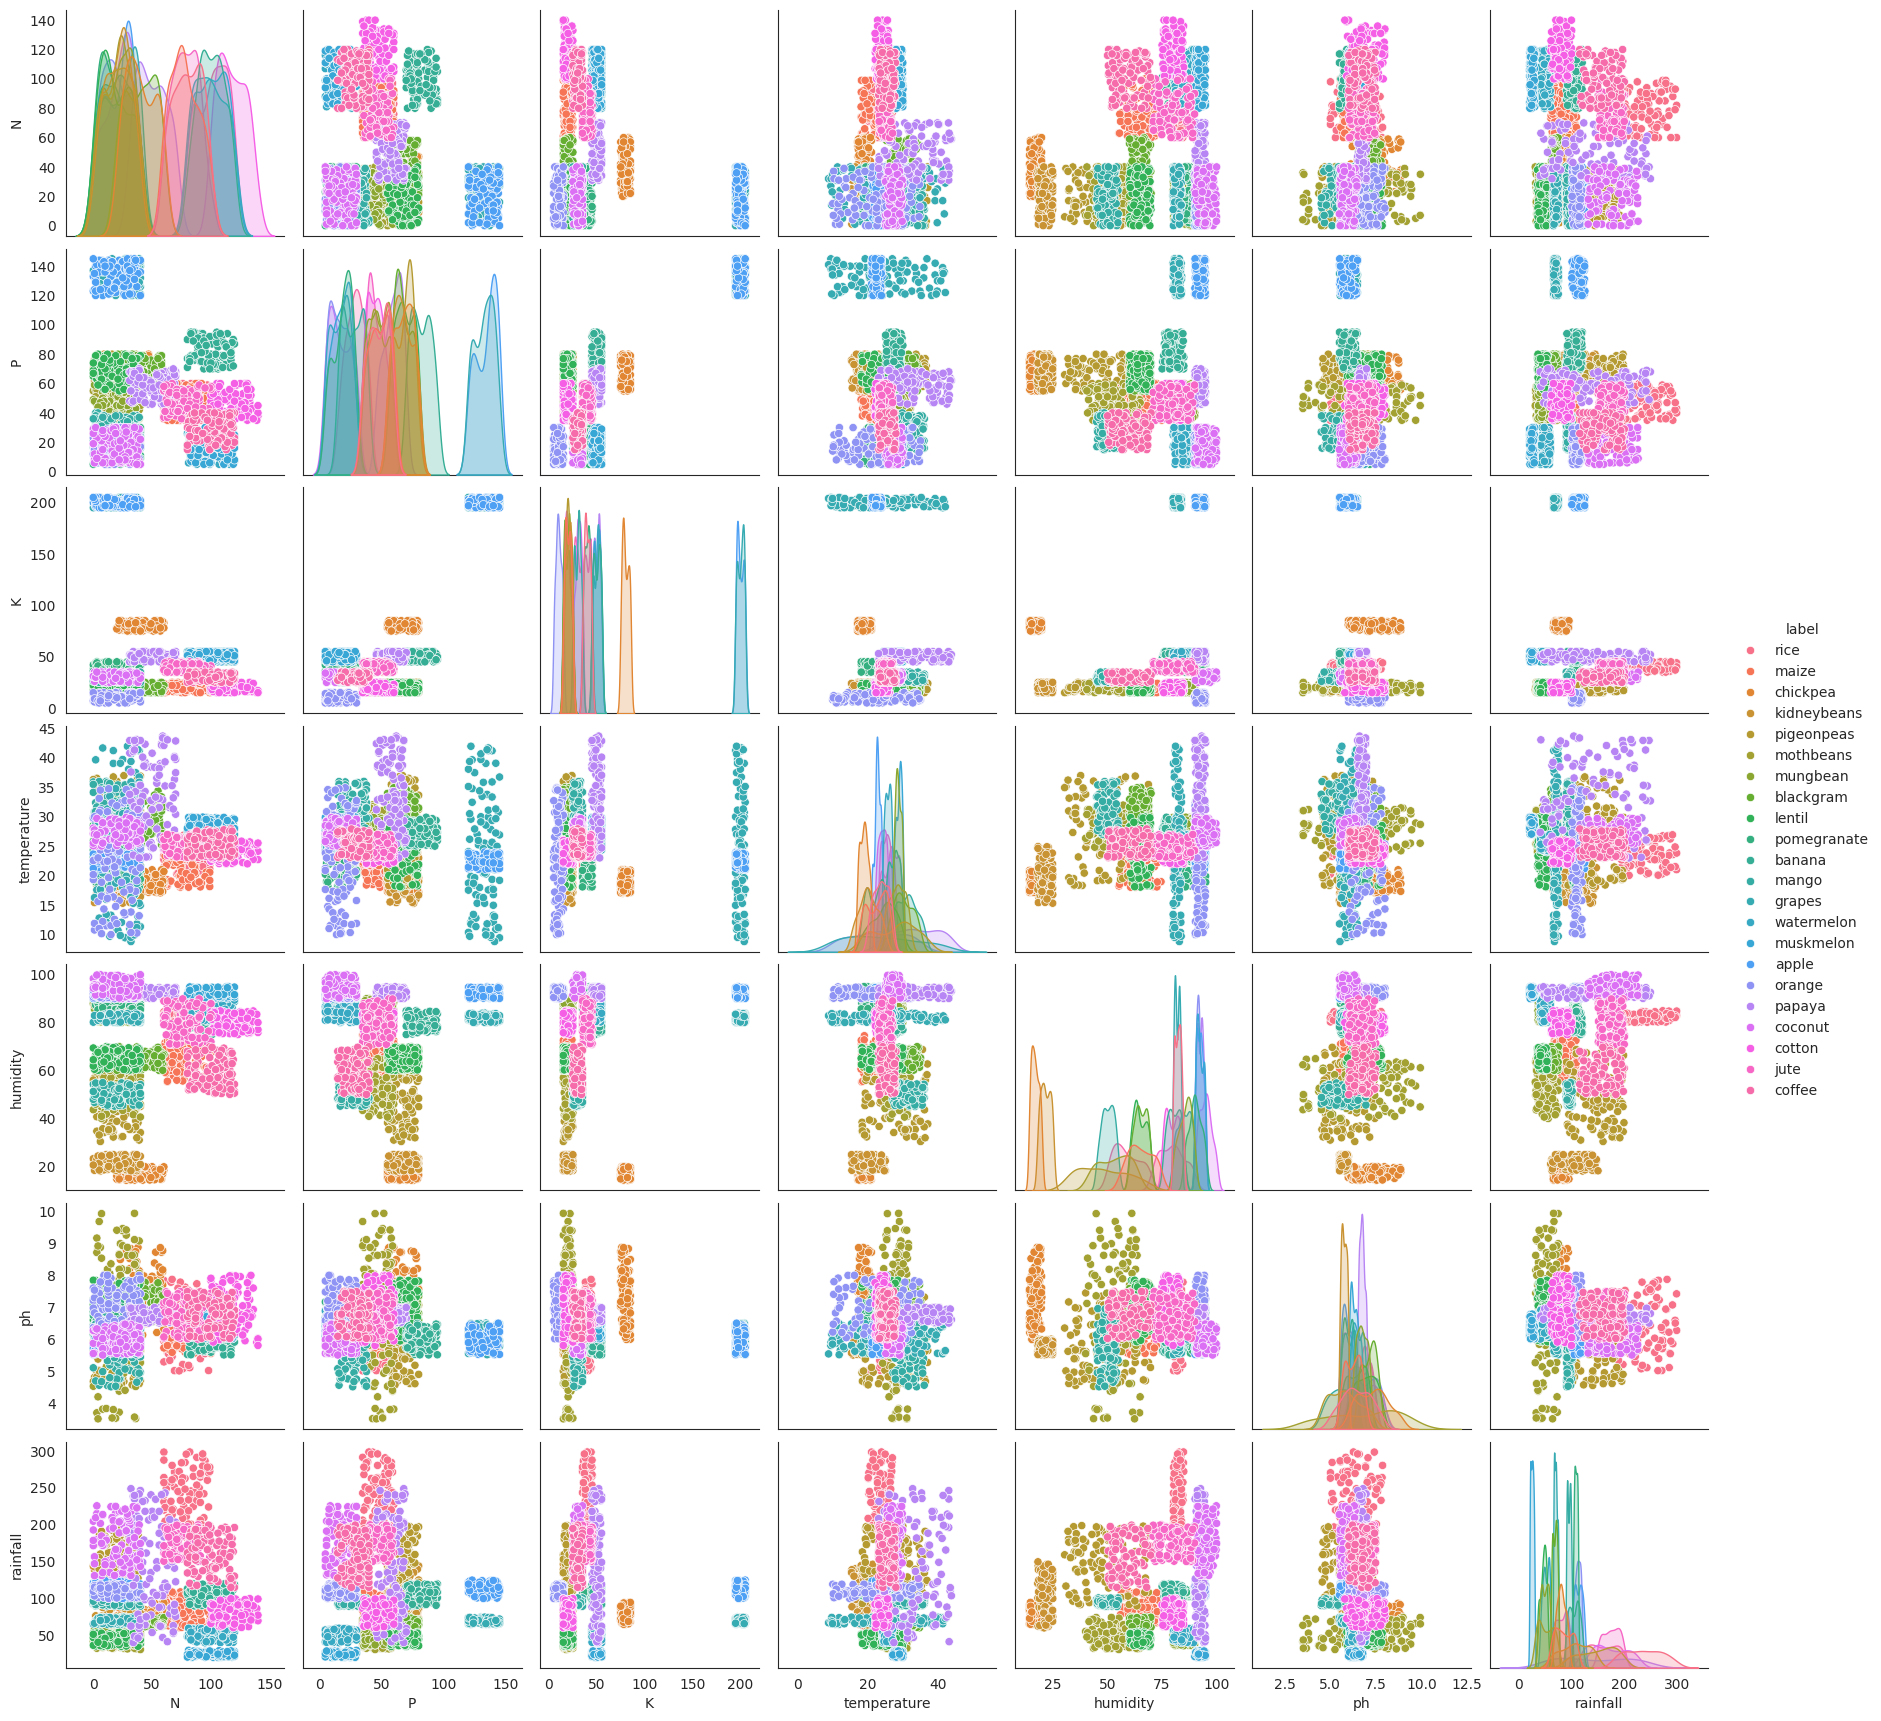

In [ ]:
sns.pairplot(df2 ,hue = 'label')

Rainfall vs humidity jointplot

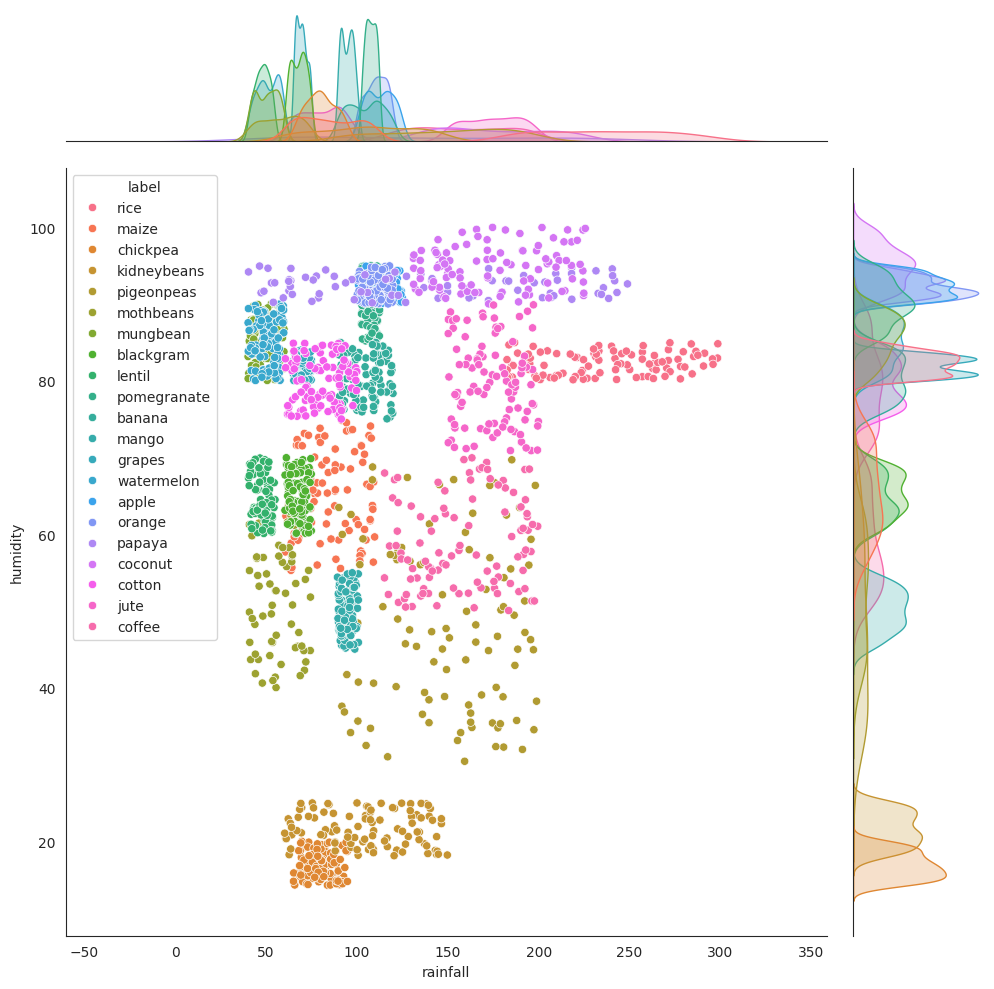

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=df2[(df2['temperature']<40) &
                                                  (df2['rainfall']>40)],height=10,hue="label")

In [ ]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show(renderer='colab')

#####Maximum permissible parameters for each crop

In [ ]:
# for interactivity
import ipywidgets
from ipywidgets import interact

In [ ]:
@interact
def summary(crops = list(df2['label'].value_counts().index)):
    x = df2[df2['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max())
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max())
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max())
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

#####Average NPK and climate condition requirements for each crop

In [ ]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(df2[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(df2[(df2['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(df2[df2['label'] == 'blackgram'][conditions].mean()))
    print("Banana : {0:.2f}".format(df2[(df2['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(df2[df2['label'] == 'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(df2[(df2['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(df2[df2['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(df2[(df2['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(df2[df2['label'] == 'muskmelon'][conditions].mean()))
    print("Grapes : {0:.2f}".format(df2[(df2['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(df2[df2['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(df2[(df2['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(df2[df2['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(df2[(df2['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(df2[df2['label'] == 'chickpea'][conditions].mean()))
    print("Lentils : {0:.2f}".format(df2[(df2['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(df2[df2['label'] == 'cotton'][conditions].mean()))
    print("Maize : {0:.2f}".format(df2[(df2['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(df2[df2['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(df2[(df2['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(df2[df2['label'] == 'mango'][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(df2[(df2['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(df2[df2['label'] == 'coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

#####Seasonal Crop prediction

In [ ]:
#Which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(df2[(df2['temperature'] > 30) & (df2['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(df2[(df2['temperature'] < 20) & (df2['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(df2[(df2['rainfall'] > 200) & (df2['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


Finding out correlation between features

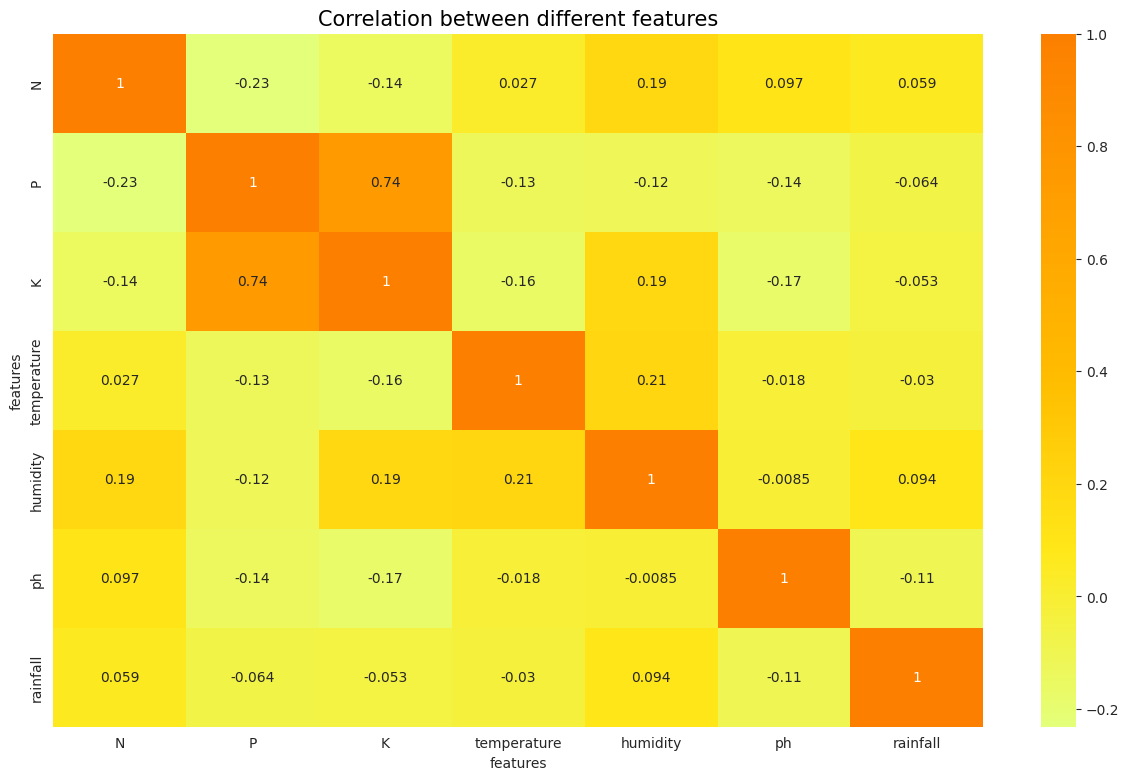

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df2.corr(numeric_only=True), annot=True,cmap='Wistia' )
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

####Modelling

In [ ]:
X = df2.drop('label', axis=1)
y = df2['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 0)

Why LightBGM?

 LightGBM is based on gradient boosting, which is an ensemble method that combines multiple weak learners (usually decision trees) to create a strong predictive model.

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.076858
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -2.982829
[LightGBM] [Info] Start training from score -3.049078
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] 

LGBMClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9894


In [ ]:
y_pred_train = model.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [ ]:
#Checking Overfitting
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9894


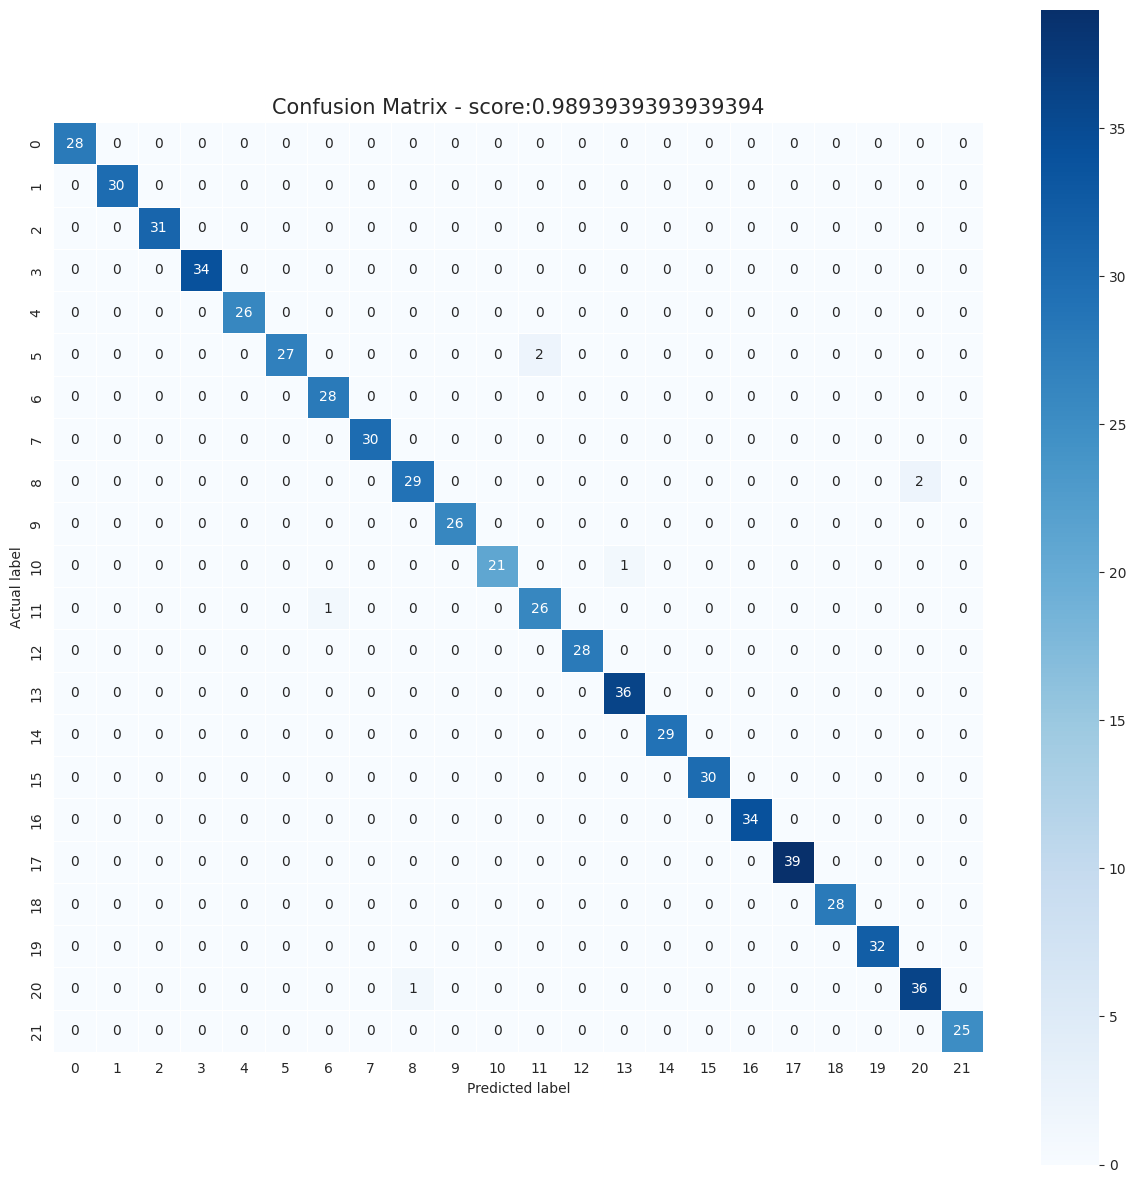

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

Classification Metrices

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      0.93      0.96        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.97      0.94      0.95        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      0.95      0.98        22
       maize       0.93      0.96      0.95        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.97      1.00      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

Prediction

In [ ]:
newdata=model.predict([[120, 50, 150, 20.879744, 75, 5.5,220]])
newdata

array(['chickpea'], dtype=object)

#MAIN PROTOTYPE

https://github.com/yashps7/FEYNN_Labs_Final_Project/tree/main/Prototype

##World Food Analysis

Food prices can vary a lot, and changes over time can often give us insights into the underlying markets and agricultural production within countries.

The price of foods gives an important indicator of the balance between agricultural production and market demand. These prices matter to consumers and producers. They have obvious impacts on consumer affordability. But they also affect the income of farmers and producers.

In low-to-middle-income countries, a large share of the population is employed in agriculture. Producers typically benefit from higher food prices; consumers from lower prices. Food markets can therefore have a strong impact on food affordability, hunger and undernourishment, and dietary quality.

In an increasingly interconnected world, the dynamics of food prices and affordability hold paramount importance in shaping societal well-being, nutritional outcomes, and economic stability. We can target special nations based on geopolitics aspects to import or export food commodities

The dataset contains the following shapes:

ShareHealthyDietIUnaffordable1: 763 observations, 4 variables

FoodExpenditurePerPersonPerYear2: 520 observations, 4 variables

ShareOfConsumerExpenditureSpentOnFood3: 520 observations, 4 variables

ShareCalorieDietUnaffordable4: 155 observations, 4 variables

In [ ]:
food1 = pd.read_csv('/content/ShareHealthyDietUnaffordable_1.csv')
food2 = pd.read_csv('/content/FoodExpenditurePerPersonPerYear_2.csv')
food3 = pd.read_csv('/content/HareOfConsumerExpenditureSpentOnFood_3.csv')
food4 = pd.read_csv('/content/ShareCalorieDietUnaffordable_4.csv')

print(food1.head())
print(food2.head())
print(food3.head())
print(food4.head())

    Entity Code  Year  \
0  Albania  ALB  2017   
1  Albania  ALB  2018   
2  Albania  ALB  2019   
3  Albania  ALB  2020   
4  Albania  ALB  2021   

   Share of the population who cannot afford a healthy diet  
0                                               31.3         
1                                               23.0         
2                                               22.2         
3                                               19.9         
4                                               15.9         
    Entity Code  Year  Total food expenditure
0  Algeria  DZA  2017                651.2000
1  Algeria  DZA  2018                645.6000
2  Algeria  DZA  2019                556.0795
3  Algeria  DZA  2020                520.0589
4  Algeria  DZA  2021                614.0008
    Entity Code  Year  Food as share of total consumer expenditure
0  Algeria  DZA  2017                                    37.305225
1  Algeria  DZA  2018                                    37.270523


In [ ]:
print("share-healthy-diet-unaffordable's shape", food1.shape)
print("food-expenditure-per-person-per-yea", food2.shape)
print("share-of-consumer-expenditure-spent-on-food", food3.shape)
print("share-calorie-diet-unaffordable", food4.shape)

share-healthy-diet-unaffordable's shape (763, 4)
food-expenditure-per-person-per-yea (520, 4)
share-of-consumer-expenditure-spent-on-food (520, 4)
share-calorie-diet-unaffordable (155, 4)


Dataset Description

In [ ]:
df = [food1, food2, food3, food4]
for i, df in enumerate (df, start=1):
    print(f"df{i}'s information:")
    print(df.info())
    print(f"df{i} summary statistics:")
    print(df.describe())
    print("\n")

df1's information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 4 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Entity                                                    763 non-null    object 
 1   Code                                                      708 non-null    object 
 2   Year                                                      763 non-null    int64  
 3   Share of the population who cannot afford a healthy diet  763 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 24.0+ KB
None
df1 summary statistics:
              Year  Share of the population who cannot afford a healthy diet
count   763.000000                                         763.000000       
mean   2018.992136                                          36.536304       
std       1.417899              

In [ ]:
#For missing any
df = [food1, food2, food3, food4]
for i, df in enumerate (df, start=1):
    print(f"df{i}'s number of missing values:")
    print(df.isnull().sum())

df1's number of missing values:
Entity                                                       0
Code                                                        55
Year                                                         0
Share of the population who cannot afford a healthy diet     0
dtype: int64
df2's number of missing values:
Entity                    0
Code                      0
Year                      0
Total food expenditure    0
dtype: int64
df3's number of missing values:
Entity                                         0
Code                                           0
Year                                           0
Food as share of total consumer expenditure    0
dtype: int64
df4's number of missing values:
Entity                                                            0
Code                                                             11
Year                                                              0
Share of the population who cannot afford sufficient calories     0
d

####Data Insights

I - Time Series Plot

Explore how total food expenditure has changed over the years

The substantial surge in food expenditure from 2020 to 2021 emerges as a complex interplay of economic resurgence, lifestyle recalibrations, digital advancements, and evolving cultural norms. This multifaceted phenomenon underscores the responsiveness of consumer behavior to a myriad of influences and highlights the resilience of individuals in adapting their spending patterns to a changing world.

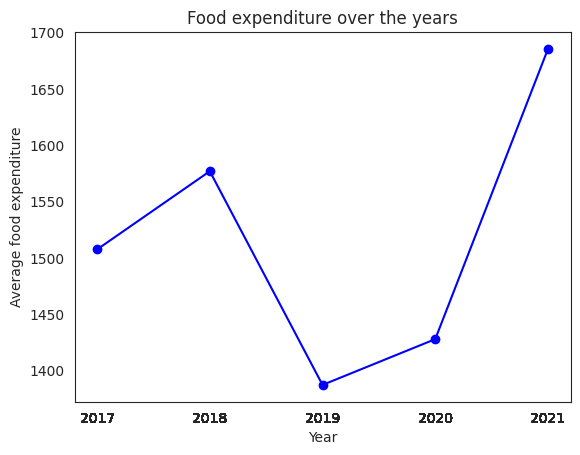

In [ ]:
#trend analysis over the years
food2['Year'] = pd.to_datetime(food2['Year'], format='%Y').dt.year
foodAvg = food2.groupby("Year")["Total food expenditure"].mean().reset_index()
foodAvg.head()
plt.plot(foodAvg["Year"],foodAvg["Total food expenditure"], label="Line", color="blue", linestyle='-', marker='o')
plt.xticks(food2['Year'])
plt.xlabel("Year")
plt.ylabel("Average food expenditure")
plt.title("Food expenditure over the years")
plt.show()

II - Regional Analysis

1. Analysis of Food Expenditure Trends in Top 10 Regions
This analysis examines the dynamic trends in food expenditure across the top 10 regions with the highest food expenditure. The heatmap visualization showcases changes in food spending over the years for regions such as Australia, Denmark, France, Hong Kong, Israel, Italy, Japan, New Zealand, Norway, and Switzerland. The study aims to identify variations in spending patterns, including notable increases and decreases, providing insights into the economic and societal factors driving these changes.

2. Data and Methodology:
The analysis relies on a dataset containing historical information on food expenditure for various countries and regions. The dataset is processed using a grouping methodology to extract data for the top 10 regions with the highest food expenditure. The heatmap visualization is constructed to represent changes in food expenditure over the years for these regions.

3. Interpreting the Heatmap:
The heatmap reveals a comprehensive overview of how food expenditure has evolved across the selected regions from 2017 to 2021. Each region is represented by a row, while the columns correspond to the years. The color gradient in each cell of the heatmap illustrates the magnitude of food expenditure for a specific region in a given year. Darker shades indicate higher spending, while lighter shades represent lower spending.

4. Key Observations:
Switzerland's Ascending Food Expenditure: Switzerland stands out with the highest food expenditure among the top 10 regions, steadily increasing from 2017 to 2021. The deepening color gradient in successive years underscores Switzerland's consistent commitment to food consumption. Contrasting Trends in Hong Kong: In contrast, Hong Kong demonstrates a decreasing trend in food spending over the years. The gradual shift from darker to lighter shades signifies a decline in food expenditure, indicating potential changes in consumer behavior or economic conditions.

5. Economic and Societal Implications:
Affordability and Economic Prosperity: The sustained rise in food expenditure for Switzerland may reflect its robust economy and higher purchasing power, enabling residents to allocate more resources to food consumption.

  Economic Fluctuations in Hong Kong: The declining food expenditure in Hong Kong may be influenced by economic fluctuations, shifts in consumer preferences, or other external factors.

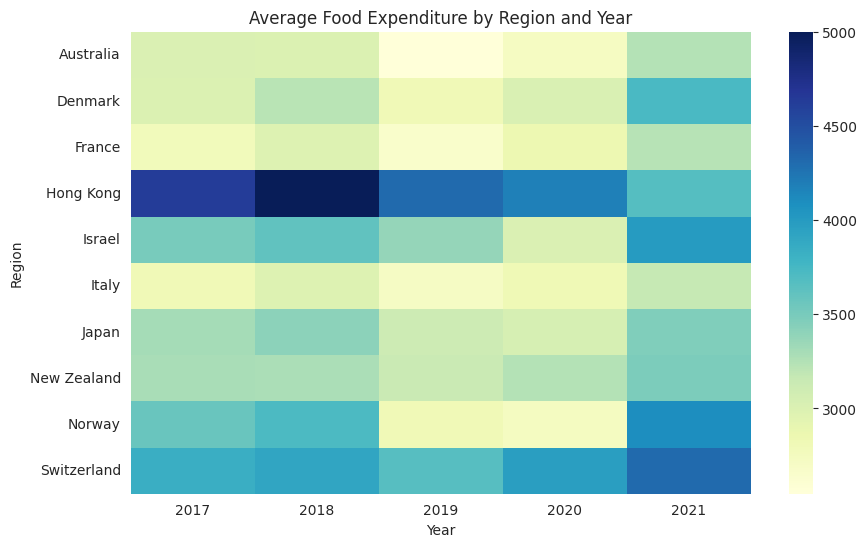

In [ ]:
#Regional Analysis of Top 10

#price trends between different reions over the years
food2_entity = food2.groupby(["Entity","Year"])["Total food expenditure"].mean().reset_index()
top_10_food2 = food2_entity.groupby("Entity")["Total food expenditure"].mean().nlargest(10).index
food2_top10 = food2_entity[food2_entity["Entity"].isin(top_10_food2)]
food2_top10_pivot = food2_top10.pivot_table(values="Total food expenditure", index="Entity", columns="Year", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(food2_top10_pivot, annot=False, fmt=".2f", cmap="YlGnBu")
plt.xlabel('Year')
plt.ylabel('Region')
plt.title('Average Food Expenditure by Region and Year')
plt.show()

III - Affordability Analysis

1. Analysis of Healthy Diet Affordability Variation in High and Low Affordability Regions
This analysis explores the disparities in healthy diet affordability across different regions by comparing the highest and lowest affordability levels. The study focuses on two key aspects: the trends in healthy diet affordability in the top 10 countries facing challenges in affording nutritious food and the top 10 countries with the lowest average share of the population unable to afford a healthy diet. By examining these extremes, the analysis aims to uncover underlying factors affecting diet accessibility and shed light on potential implications for public health and policy.

2. Data and Methodology:
The analysis relies on a comprehensive dataset encompassing food expenditure and relevant indicators for diverse countries. The dataset is meticulously processed to extract specific data for the top 10 countries encountering challenges in accessing a nutritious diet. Similarly, the dataset is employed to identify the top 10 countries with the lowest average share of the population unable to afford a healthy diet. These countries serve as representative cases for high and low affordability levels.

3. Trends in Affordability of Healthy Diets:
The initial visualization delves into the trends surrounding the affordability of healthy diets within the top 10 countries that grapple with obstacles in accessing nutritious food. This group encompasses nations such as Madagascar, Burundi, Malawi, Central African Republic, Nigeria, Liberia, Niger, Mozambique, Sudan, and Congo, with the former three, Madagascar, Burundi, and Malawi, particularly near full affordability at almost 100%. This graphical representation unveils the challenges faced by the populations of these countries in securing a healthful diet, shedding light on potential discrepancies across regions and the persistent nature of affordability hurdles.

4. Disparities Across Regions:
A subsequent graph accentuates the disparities in healthy diet affordability among various regions by spotlighting the top 10 countries characterized by the lowest average share of their populations capable of affording a nutritious diet. This set includes nations such as Luxembourg, Ireland, Czechia, Cyprus, United Arab Emirates, Finland, Slovenia, Iceland, Azerbaijan, and Switzerland, with Azerbaijan and Switzerland registering an affordability rate of 0. This comparative visualization serves to identify regions where commendable strides have been made in offering economical and nourishing dietary options, while simultaneously exposing regions where accessibility to such options remains constrained.

5. Key Findings:
High Affordability Regions: The analysis uncovers that regions with higher healthy diet affordability levels exhibit consistent patterns of access to nutritious food. This suggests the presence of conducive socio-economic conditions supporting healthy eating practices.

  Low Affordability Regions: Conversely, regions marked by low affordability levels reflect the complex interplay of economic, social, and policy factors that hinder healthy diet accessibility. The visualization underscores the urgency of addressing these challenges to enhance public health outcomes.

<ipython-input-91-e55ec1c6e81c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




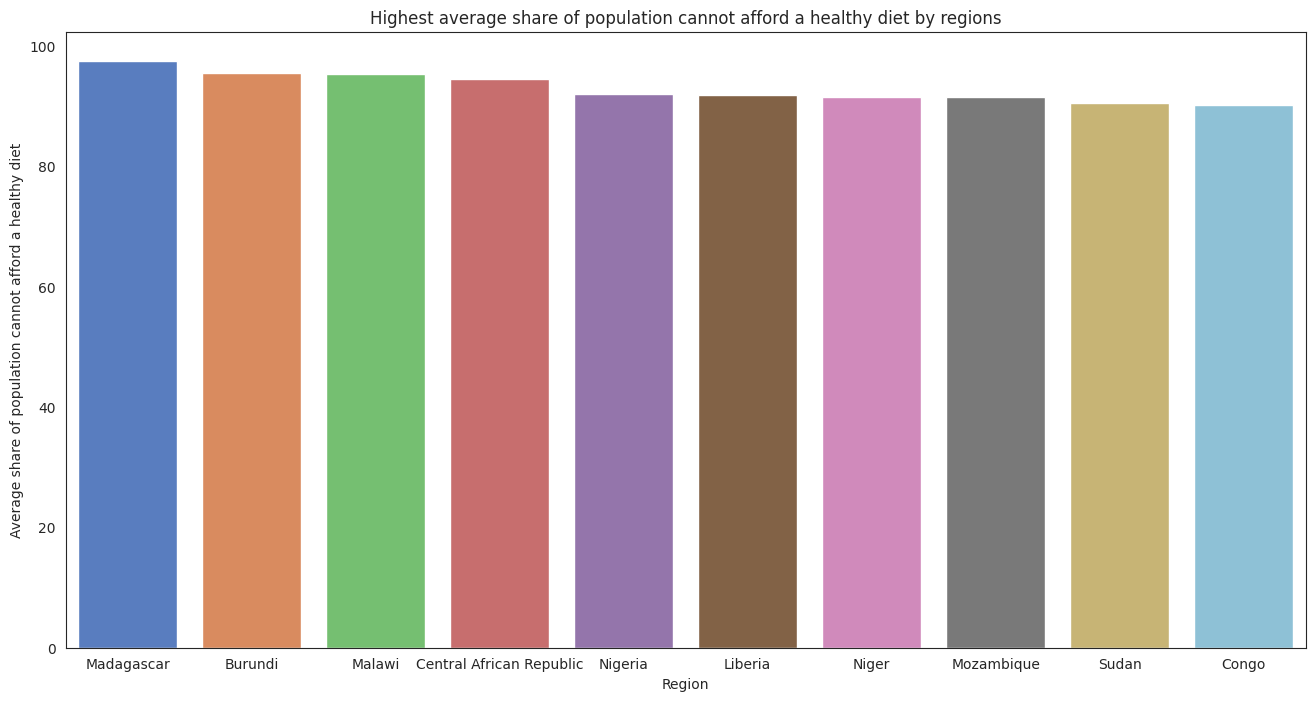

<ipython-input-91-e55ec1c6e81c>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




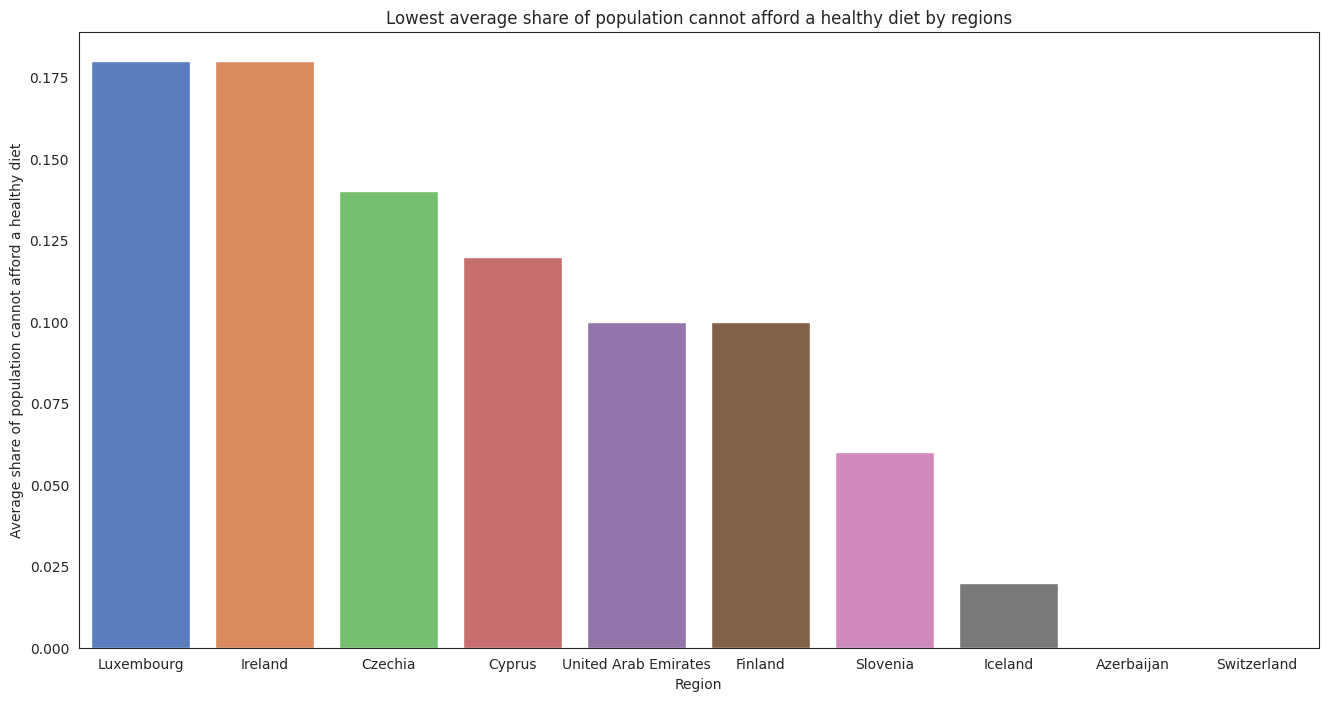

In [ ]:
#Highest and lowest affordability levels across different regions
food1_entity = food1.groupby("Entity")["Share of the population who cannot afford a healthy diet"].mean().reset_index()
food1_entity = food1_entity.sort_values("Share of the population who cannot afford a healthy diet", ascending=False).head(10)
plt.figure(figsize=(16,8))
sns.barplot(x='Entity', y='Share of the population who cannot afford a healthy diet', data=food1_entity, palette='muted')
plt.xlabel('Region')
plt.ylabel('Average share of population cannot afford a healthy diet')
plt.title('Highest average share of population cannot afford a healthy diet by regions')
plt.show()

food1_entity = food1.groupby("Entity")["Share of the population who cannot afford a healthy diet"].mean().reset_index()
food1_entity = food1_entity.sort_values("Share of the population who cannot afford a healthy diet", ascending=False).tail(10)
plt.figure(figsize=(16,8))
sns.barplot(x='Entity', y='Share of the population who cannot afford a healthy diet', data=food1_entity, palette='muted')
plt.xlabel('Region')
plt.ylabel('Average share of population cannot afford a healthy diet')
plt.title('Lowest average share of population cannot afford a healthy diet by regions')
plt.show()

#####B: Analysis of Food Expenditure and Diet Affordability Variation in Selected African Regions

This analysis delves into the trends and variations in food expenditure, healthy diet affordability, and calorie-sufficient affordability across four distinct African regions: Angola, Nigeria, South Africa, and Tanzania. The aim is to shed light on the differing dynamics of these indicators and identify any significant patterns that may impact food security and nutrition.

1. Data and Methodology:
The analysis is based on a comprehensive dataset containing information on food expenditure, healthy diet affordability, and calorie-sufficient affordability across various countries and regions by combining 3 datasets (food1, food3, food4). Specifically, this study focuses on the selected regions of Angola, Nigeria, South Africa, and Tanzania. The dataset is meticulously processed to isolate the relevant indicators and regions for analysis.

2. Key Observations:
Stability in Diet Affordability: The analysis reveals that the share of the population unable to afford a healthy diet and the share of the population able to afford a calorie-sufficient diet appear relatively stable across the four regions. This suggests a consistent level of diet affordability challenges in these regions over the studied period.

  Divergent Food Expenditure Trends: Notably, food expenditure displays varying trends across the regions. While Nigeria and South Africa appear to maintain relatively consistent levels of food expenditure, Tanzania experiences a noticeable decrease, suggesting potential challenges in accessing affordable and nutritious food. Conversely, Angola demonstrates an increase in food expenditure, reflecting potential improvements in affordability or changing consumption patterns.

3. Implications and Significance:
Nutritional Security Considerations: The observed stability in diet affordability challenges emphasizes the need for targeted interventions to improve the accessibility of nutritious food for vulnerable populations. Addressing these challenges is crucial for promoting health and well-being.

  Economic and Policy Dynamics: The divergent trends in food expenditure across the selected regions may reflect economic factors, such as inflation rates, income distribution, and government policies. Understanding these dynamics is essential for effective policy formulation and resource allocation.

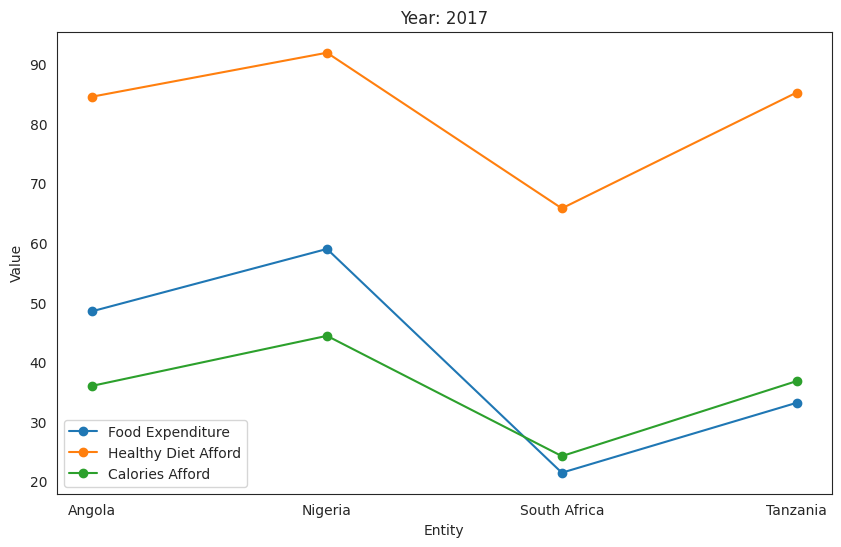

In [ ]:
food1_mean = food1.groupby(['Entity'])['Share of the population who cannot afford a healthy diet'].mean().reset_index()
food4_mean = food4.groupby(['Entity'])['Share of the population who cannot afford sufficient calories'].mean().reset_index()
merged_df = pd.merge(food1_mean, food3, on ='Entity')
merged_df = pd.merge(merged_df, food4_mean, on = 'Entity')
merged_df = merged_df.rename(columns={'Share of the population who cannot afford a healthy diet':'Healthy Diet Afford', 'Share of the population who cannot afford sufficient calories':'Calories Afford', 'Food as share of total consumer expenditure':'Food Expenditure'})

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

top_countries_ca = merged_df.nlargest(20, 'Calories Afford')['Entity']  # Filter top countries based on Calories Afford
filtered_df = merged_df[merged_df['Entity'].isin(top_countries_ca)] #Only the top countries
filtered_df = filtered_df.drop_duplicates(subset=['Entity', 'Year'])

years = filtered_df['Year'].unique()  #List of unique years
fig, ax = plt.subplots(figsize=(10, 6))

def update(frame):
    ax.clear()
    year_data = filtered_df[filtered_df['Year'] == years[frame]]
    ax.plot(year_data['Entity'], year_data['Food Expenditure'], marker='o', label='Food Expenditure')
    ax.plot(year_data['Entity'], year_data['Healthy Diet Afford'], marker='o', label='Healthy Diet Afford')
    ax.plot(year_data['Entity'], year_data['Calories Afford'], marker='o', label='Calories Afford')
    ax.set_xlabel('Entity')
    ax.set_ylabel('Value')
    ax.set_title(f'Year: {years[frame]}')
    ax.legend()

#Animation with the number of frames equal to the number of unique years
ani = FuncAnimation(fig, update, frames=len(years), repeat=True)

# Display the animation using IPython.display
HTML(ani.to_jshtml())

Correlations between Healthy Diet Affordability, Food Expenditure, and Calorie Sufficiency Affordability

Correlation Findings:
Healthy Diet Affordability and Food Expenditure (0.78): A robust and significant correlation coefficient of 0.78 reveals a strong positive association between healthy diet affordability and food expenditure. This linkage suggests that regions or countries where individuals can afford healthier diets tend to allocate a larger proportion of their financial resources towards purchasing food. The correlation underscores the crucial role of economic capacity in fostering healthier dietary choices.

Healthy Diet Affordability and Calorie Sufficiency Affordability (0.66): The correlation coefficient of 0.66 showcases a noteworthy positive correlation between healthy diet affordability and calorie sufficiency affordability. This connection implies that areas with enhanced healthy diet accessibility also tend to exhibit a higher likelihood of affording diets that meet sufficient caloric needs. This insight underscores the multifaceted nature of dietary adequacy and highlights the potential synergies between various aspects of diet affordability.

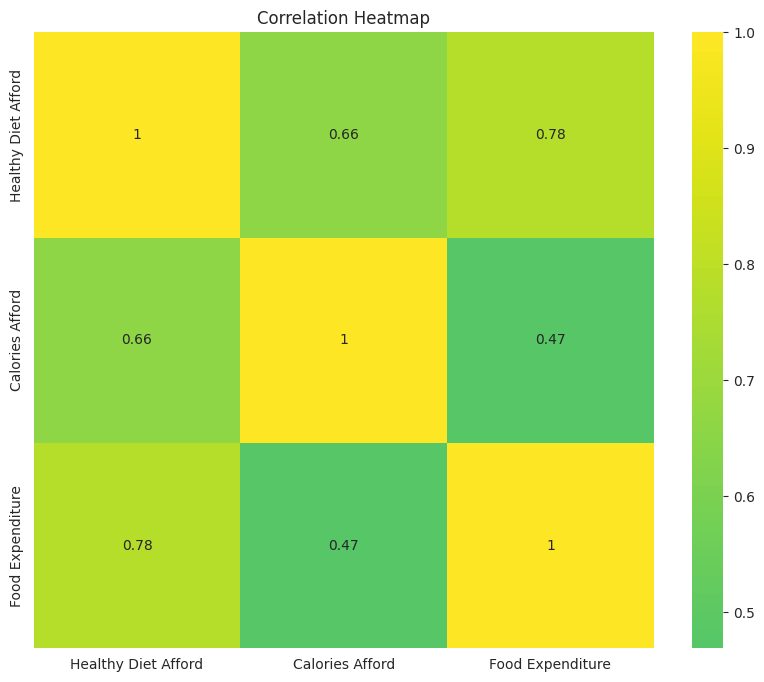

In [ ]:
cols = ["Healthy Diet Afford", "Calories Afford", "Food Expenditure"]
corr_subset = merged_df[cols]
corr_matrix = corr_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", center=0)
plt.title("Correlation Heatmap")
plt.show()

###Conclusion
From above analysis we can discover many potential patterns and opportunities to target and work upon.